In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD
from pydmd import MrDMD
from pydmd import SpDMD
from pydmd import FbDMD
import scipy.integrate

Take a Numpy array and perform DMD

In [35]:
file_dir = r'D:\Pycharm Projects\EEG-Game\EEGNetExports\EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00\pearson\alpha'
file = f'{file_dir}\\Numpy_Raw_Epoch_of_EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00.npy'
Xs = np.load(file)
print(Xs.shape)

(33, 14, 512)


Set up DMD - reference https://www.sciencedirect.com/science/article/pii/S0165027015003829

In [36]:

matricies = []
h = 100
length = Xs.shape[2]-h
for X in Xs:
    Xaug = X[:, 0:length]
    print(Xaug.shape)
    for k in range(1, h):
        Xaug = np.concatenate((Xaug, X[:, k:length+k]), axis=0)
        print(Xaug.shape)
    matricies.append(Xaug)
    print(Xaug.shape)


# print(X[0])
# dmd = DMD()
# dmd.fit(Xaug)

(14, 412)
(28, 412)
(42, 412)
(56, 412)
(70, 412)
(84, 412)
(98, 412)
(112, 412)
(126, 412)
(140, 412)
(154, 412)
(168, 412)
(182, 412)
(196, 412)
(210, 412)
(224, 412)
(238, 412)
(252, 412)
(266, 412)
(280, 412)
(294, 412)
(308, 412)
(322, 412)
(336, 412)
(350, 412)
(364, 412)
(378, 412)
(392, 412)
(406, 412)
(420, 412)
(434, 412)
(448, 412)
(462, 412)
(476, 412)
(490, 412)
(504, 412)
(518, 412)
(532, 412)
(546, 412)
(560, 412)
(574, 412)
(588, 412)
(602, 412)
(616, 412)
(630, 412)
(644, 412)
(658, 412)
(672, 412)
(686, 412)
(700, 412)
(714, 412)
(728, 412)
(742, 412)
(756, 412)
(770, 412)
(784, 412)
(798, 412)
(812, 412)
(826, 412)
(840, 412)
(854, 412)
(868, 412)
(882, 412)
(896, 412)
(910, 412)
(924, 412)
(938, 412)
(952, 412)
(966, 412)
(980, 412)
(994, 412)
(1008, 412)
(1022, 412)
(1036, 412)
(1050, 412)
(1064, 412)
(1078, 412)
(1092, 412)
(1106, 412)
(1120, 412)
(1134, 412)
(1148, 412)
(1162, 412)
(1176, 412)
(1190, 412)
(1204, 412)
(1218, 412)
(1232, 412)
(1246, 412)
(1260, 412

Print Data, reconstructed data, and error:

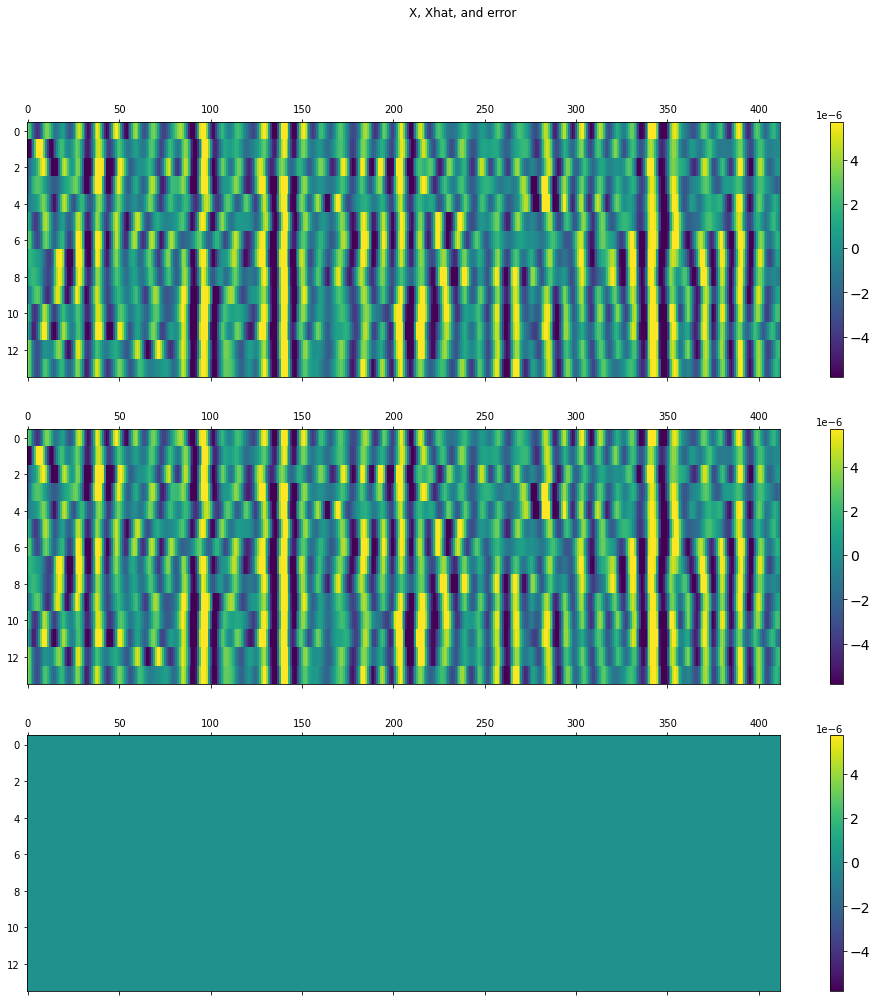

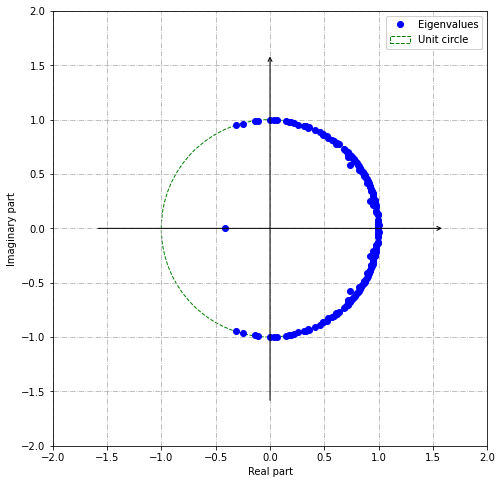

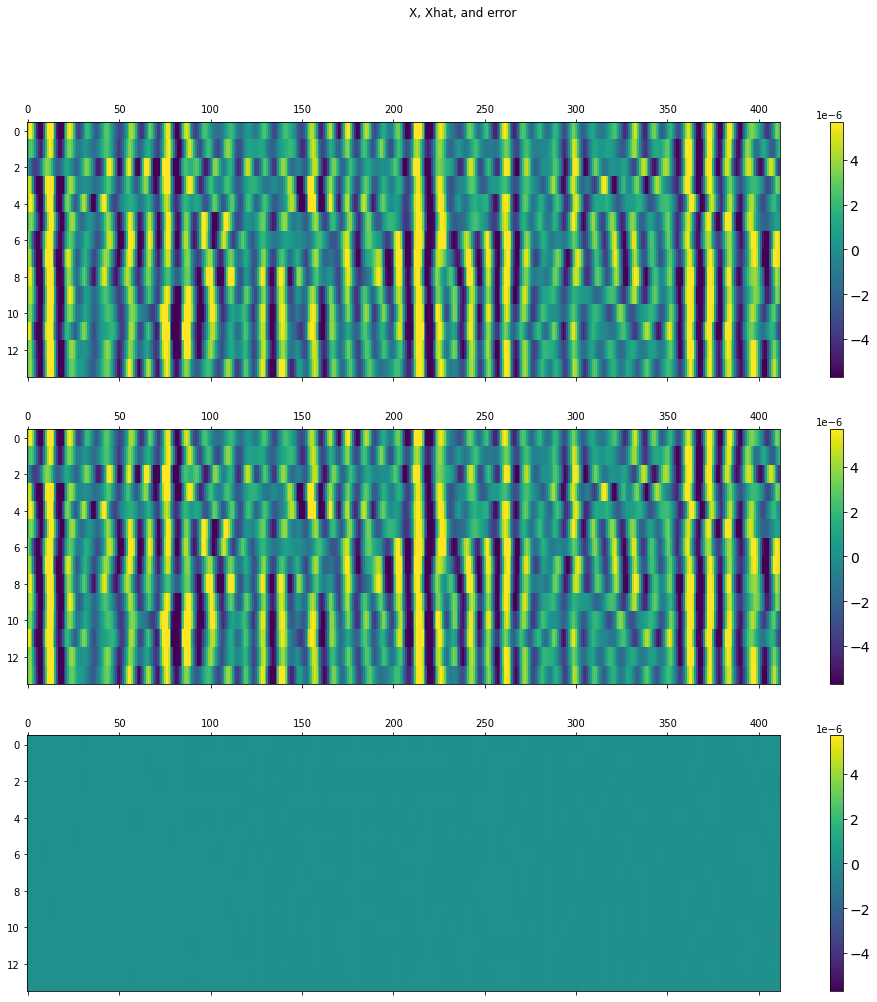

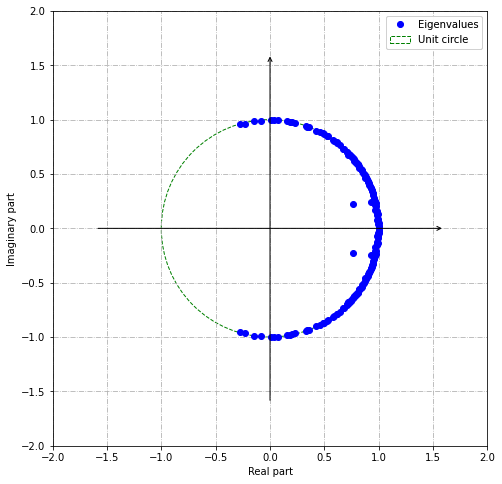

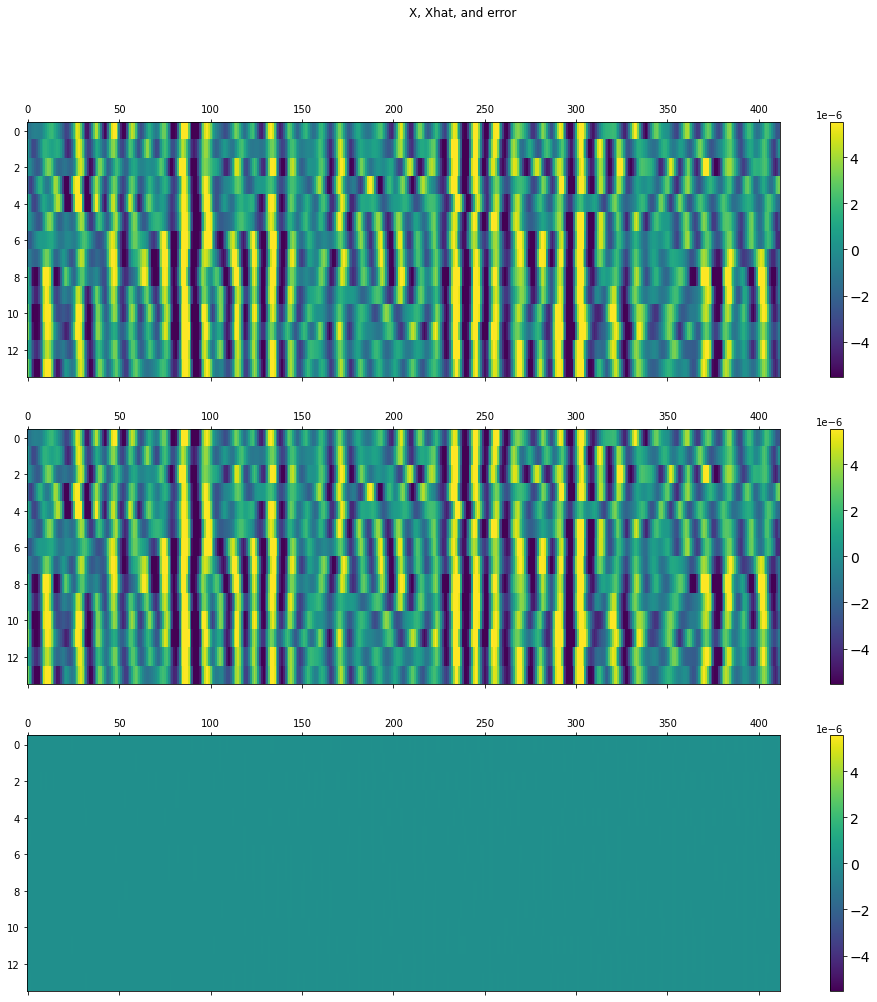

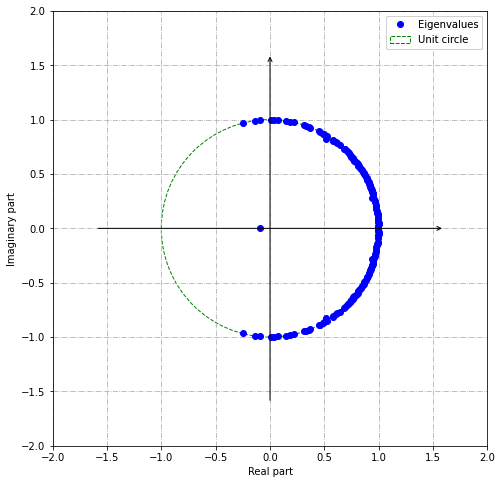

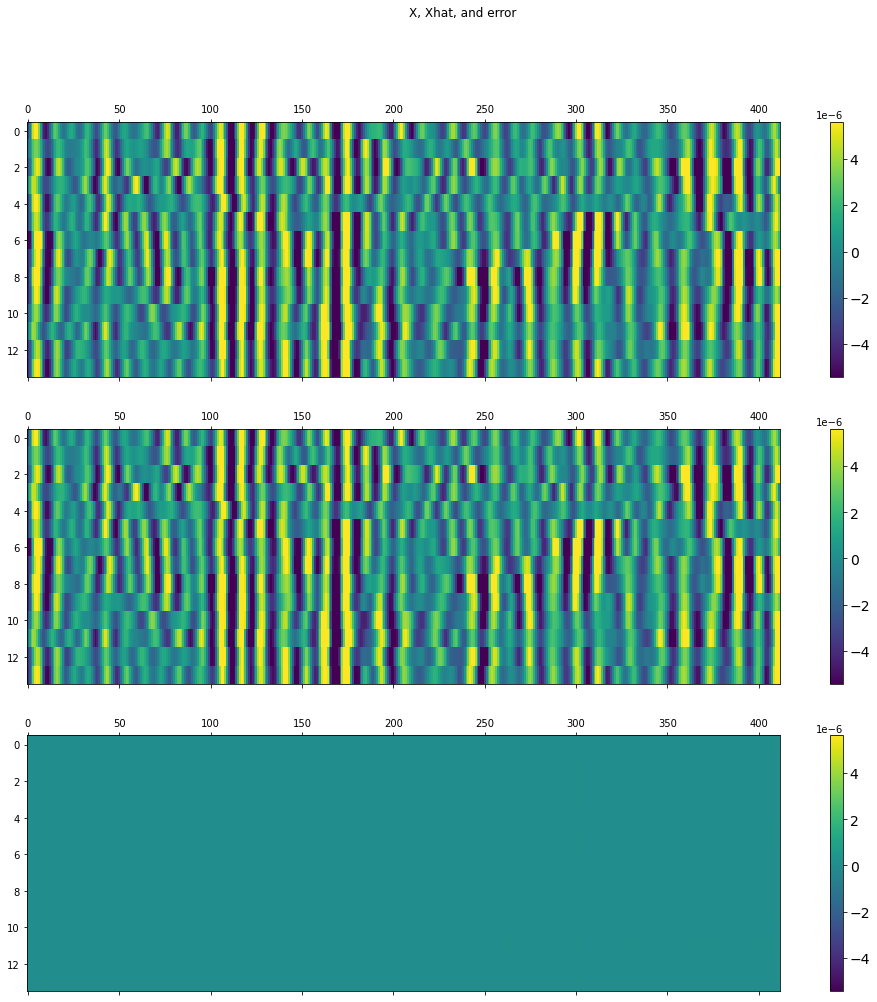

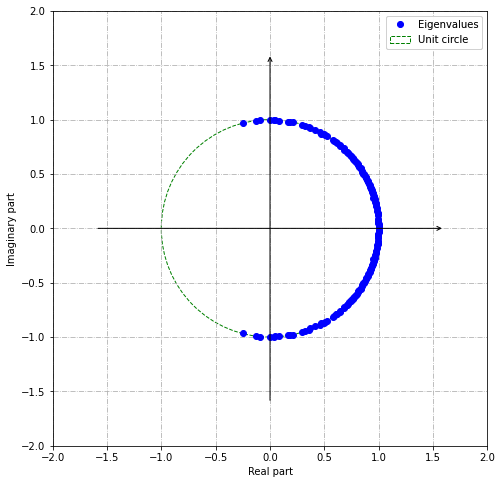

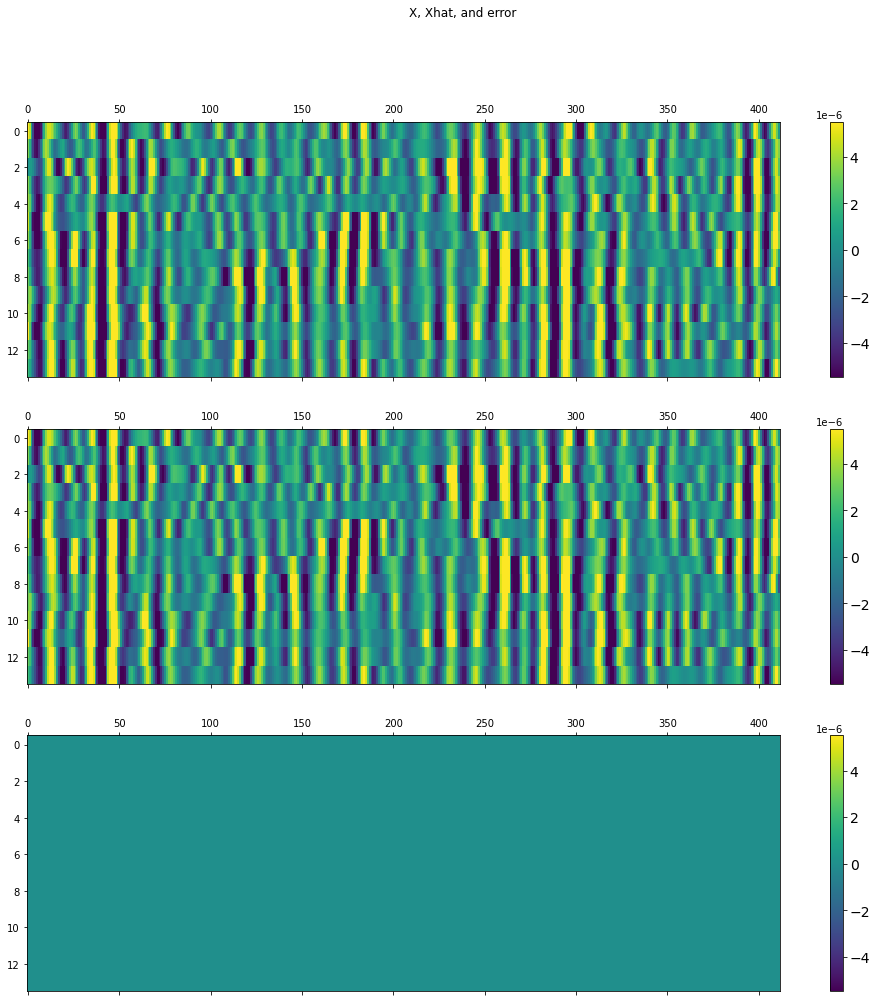

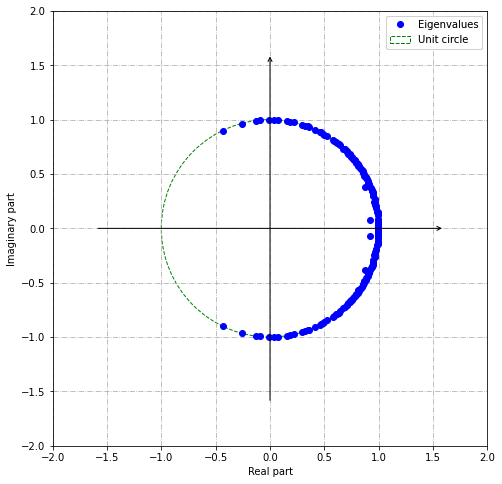

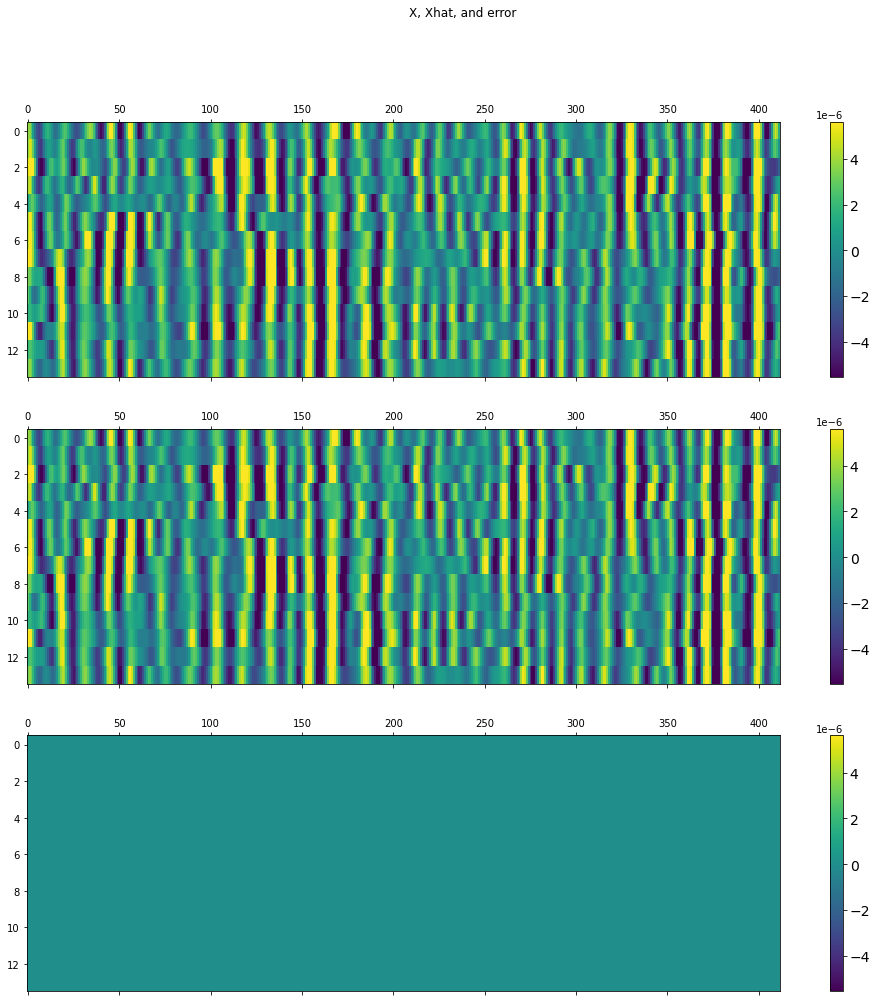

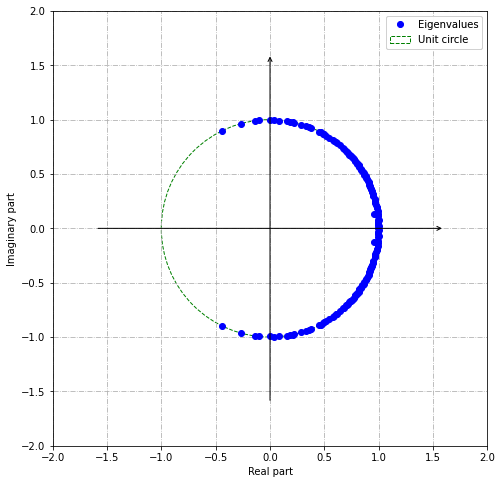

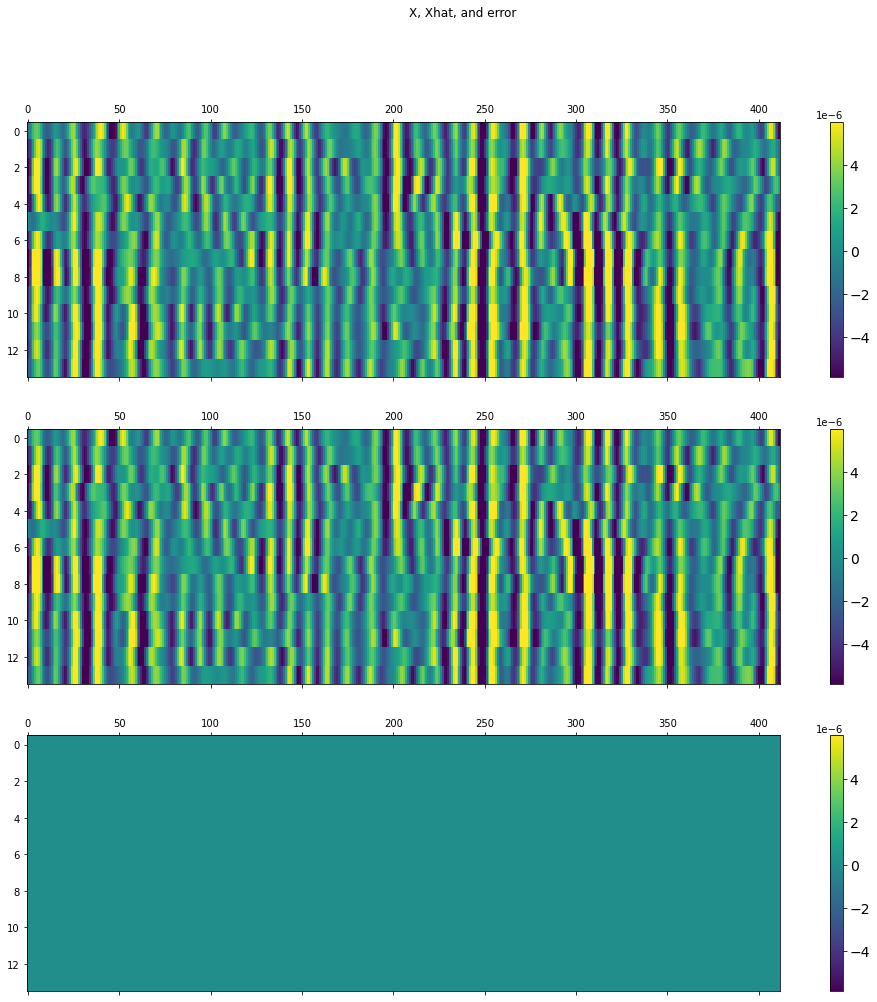

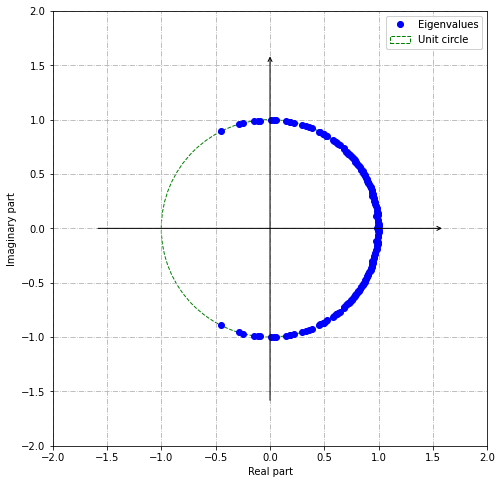

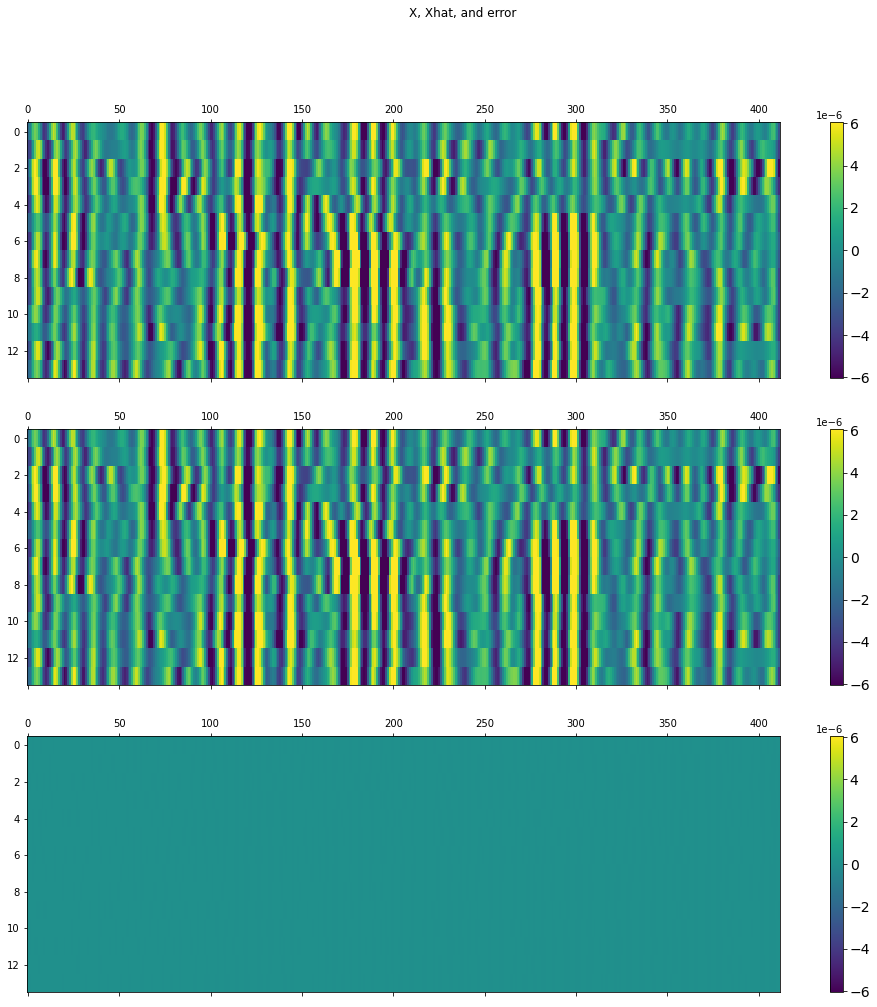

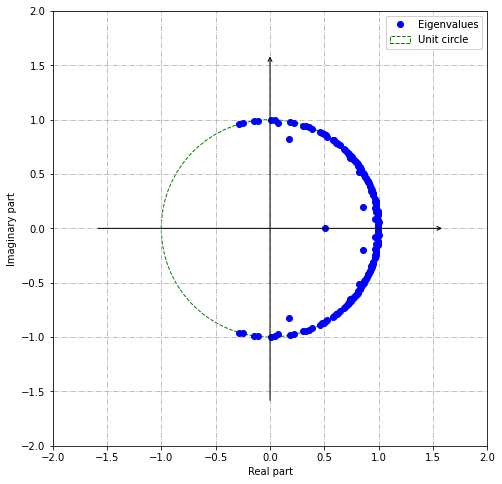

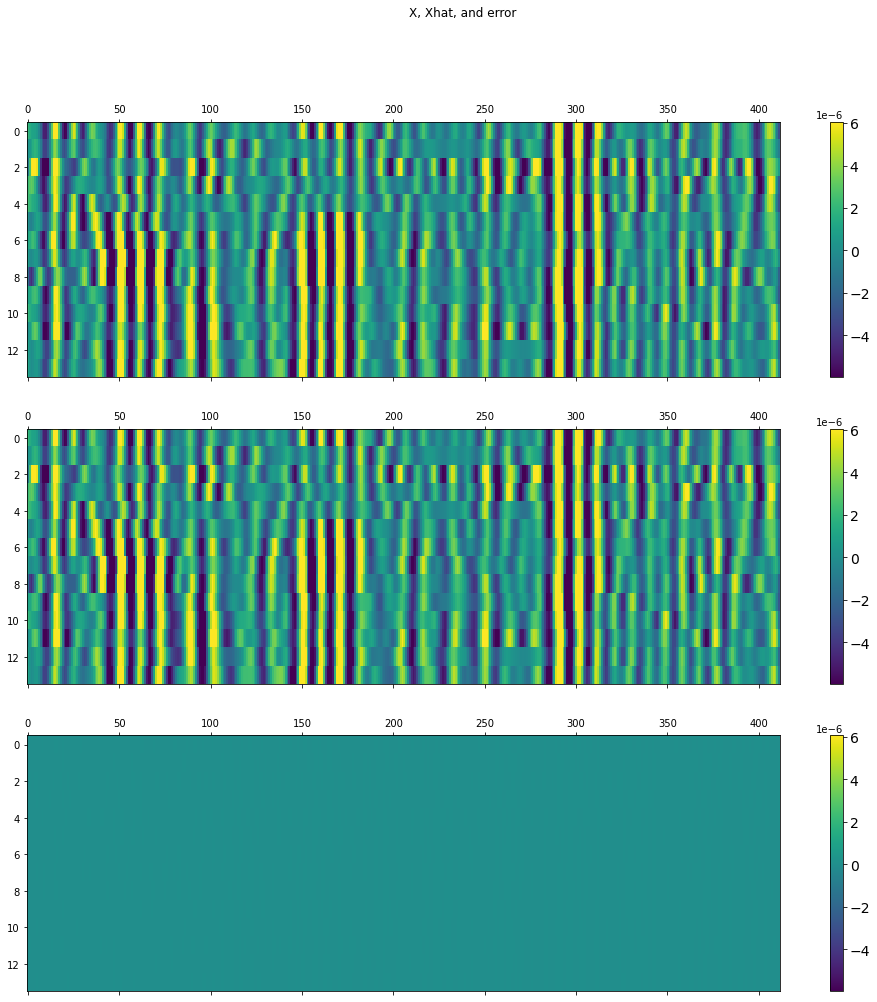

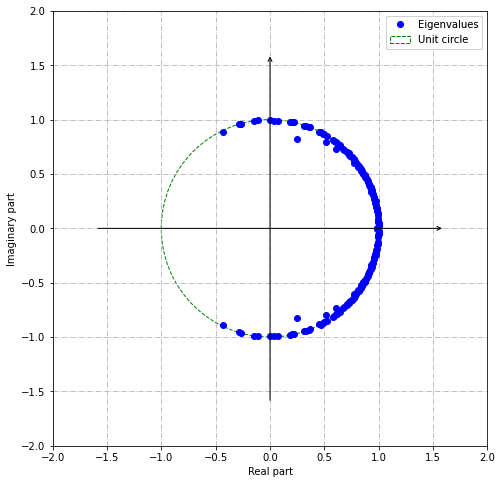

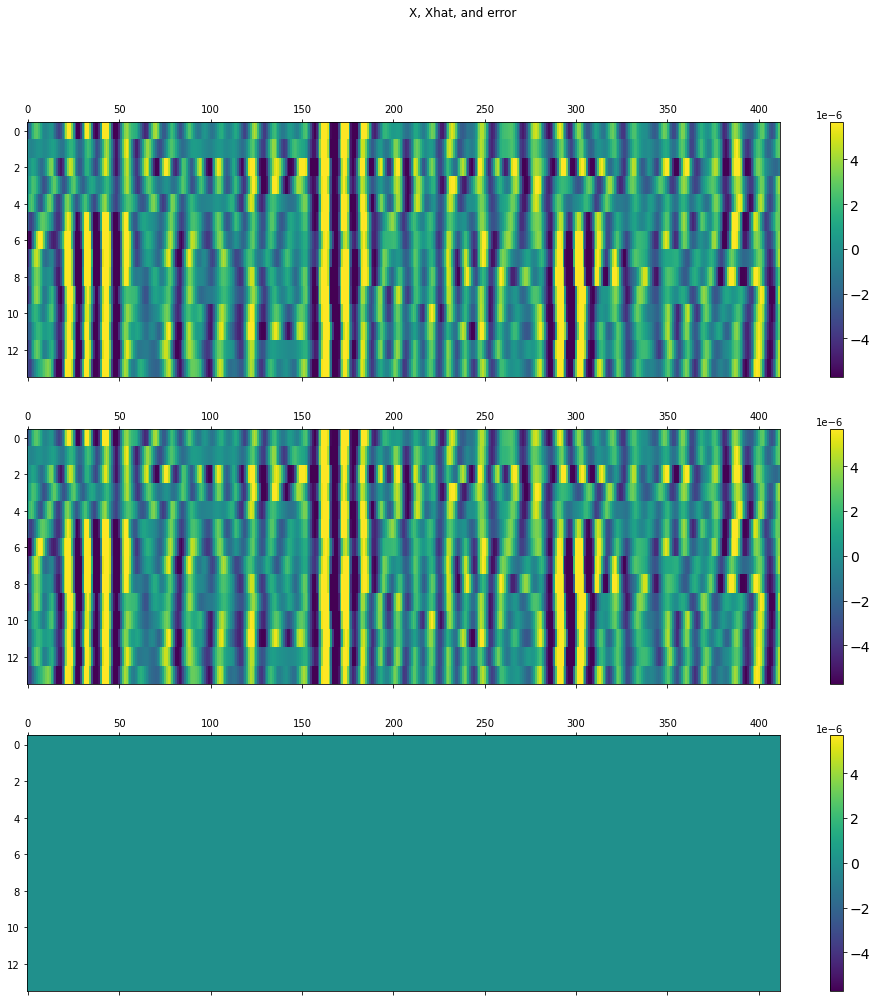

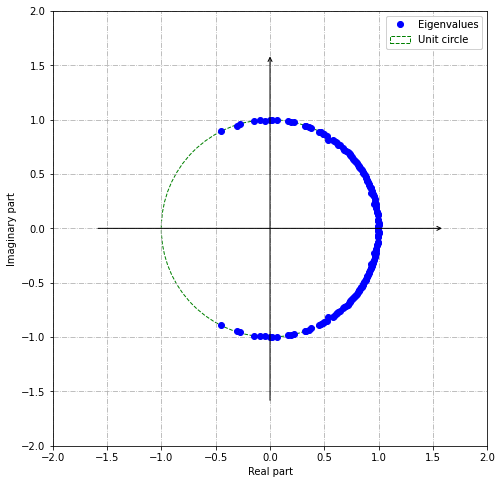

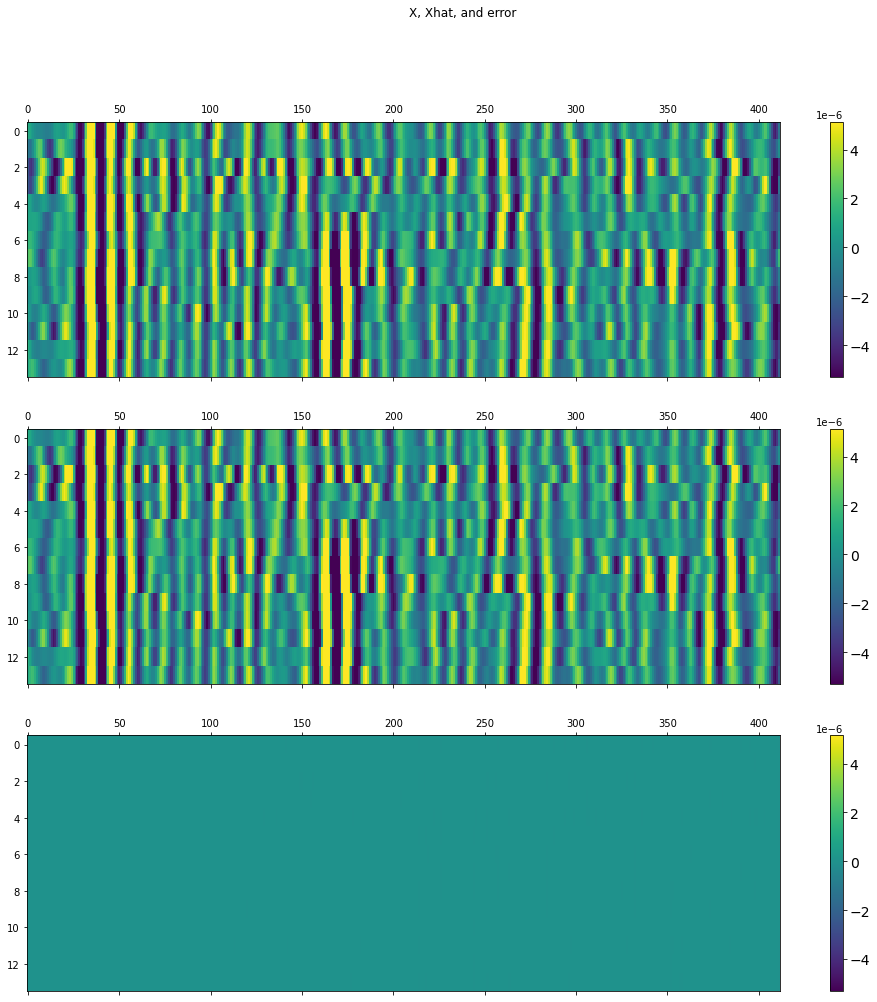

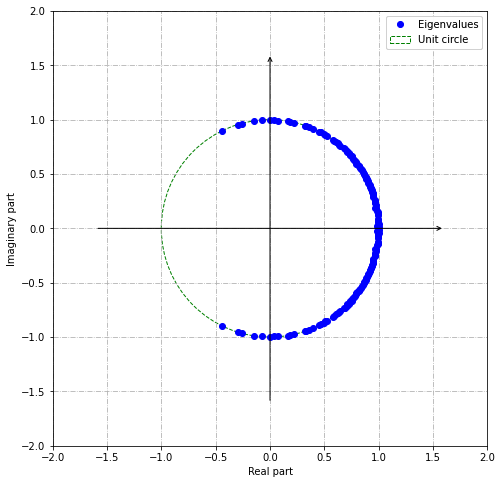

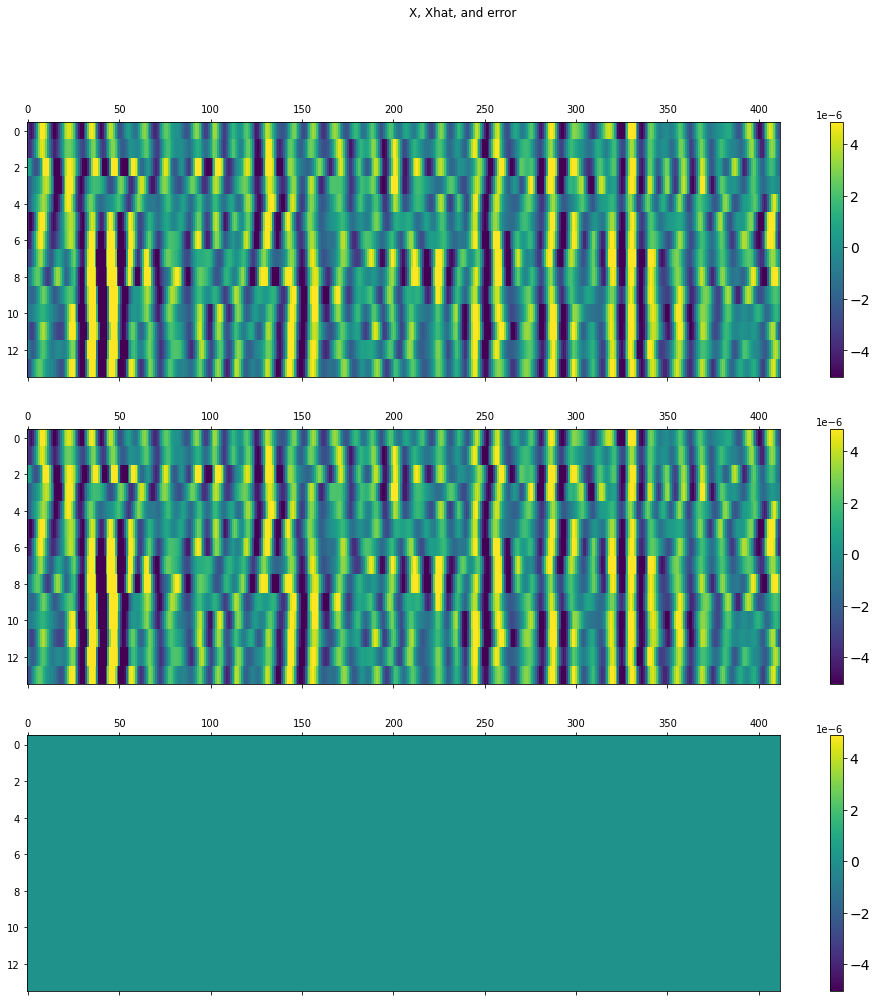

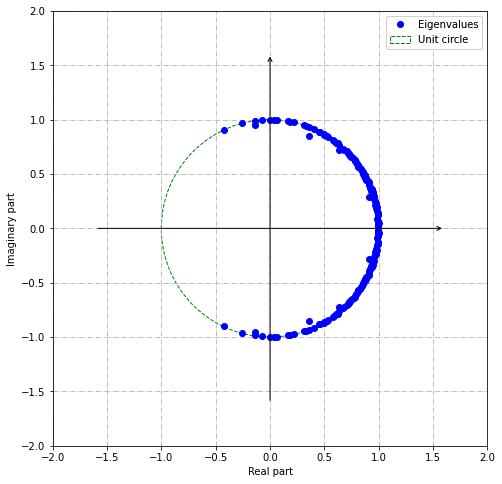

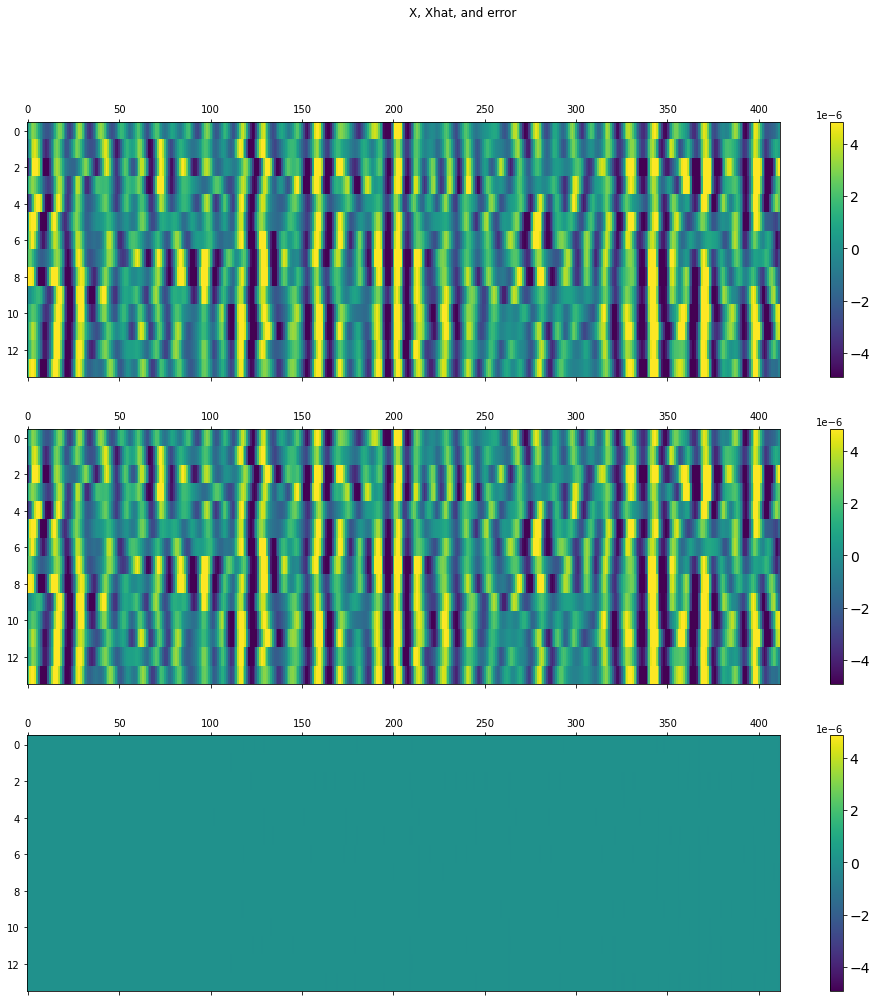

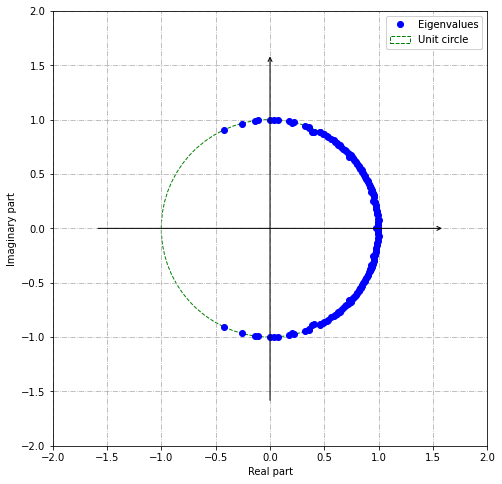

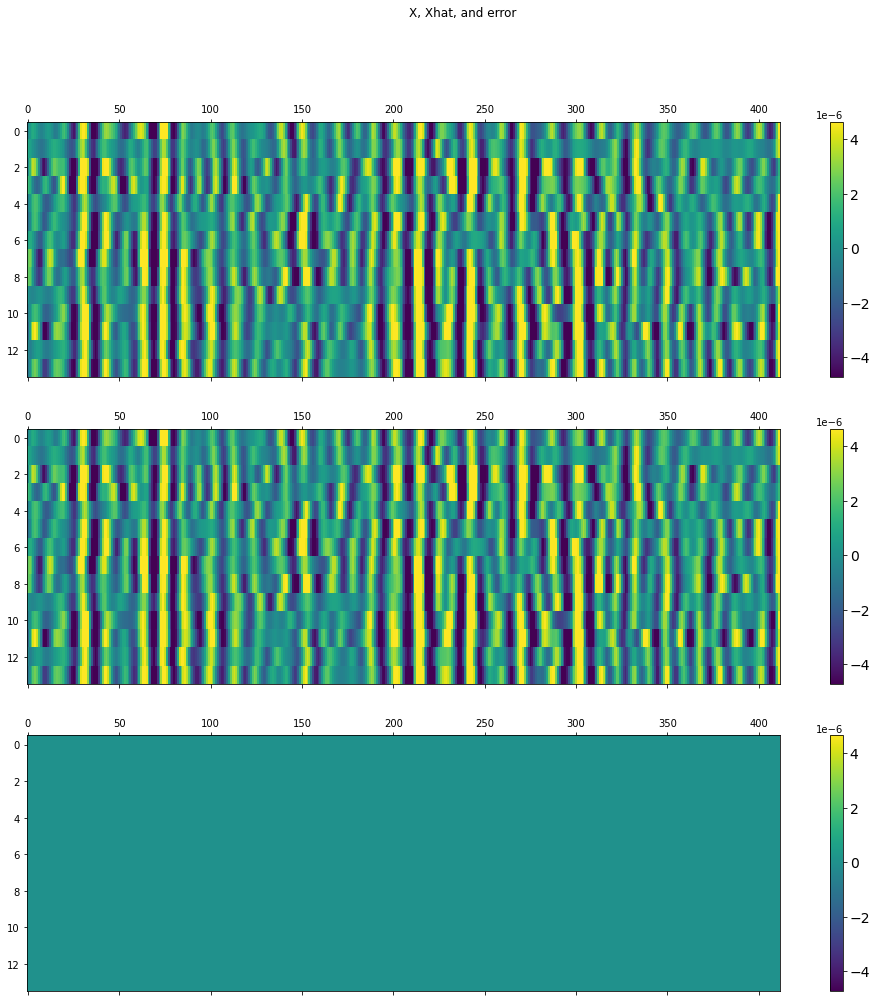

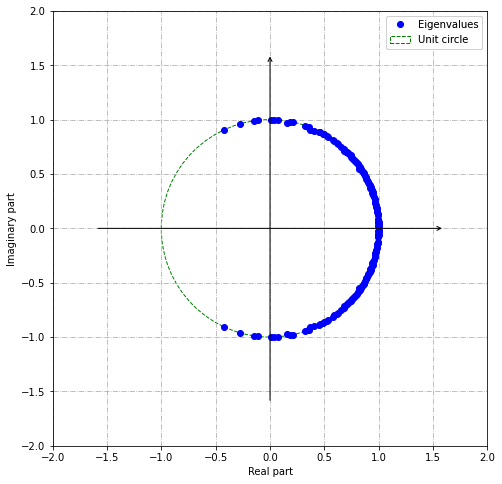

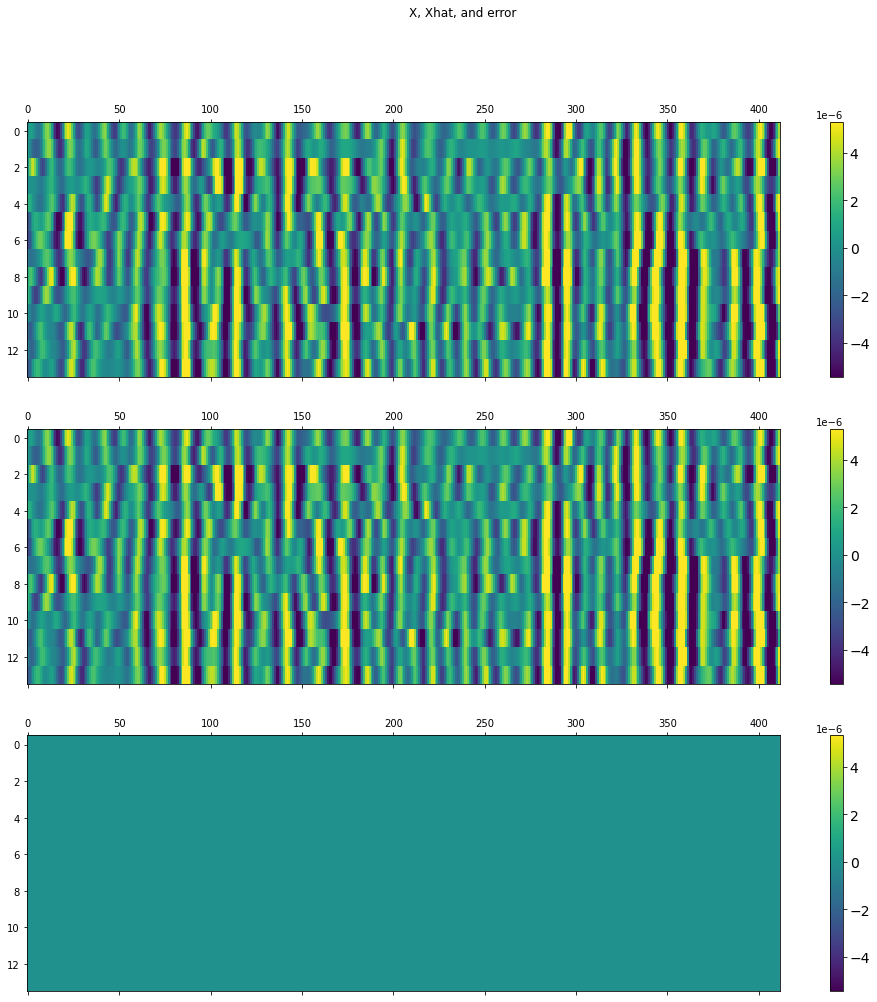

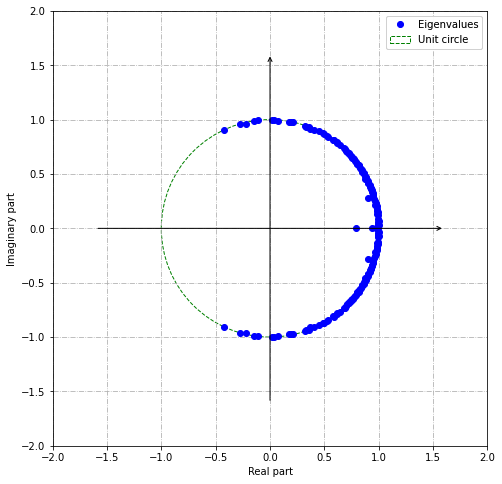

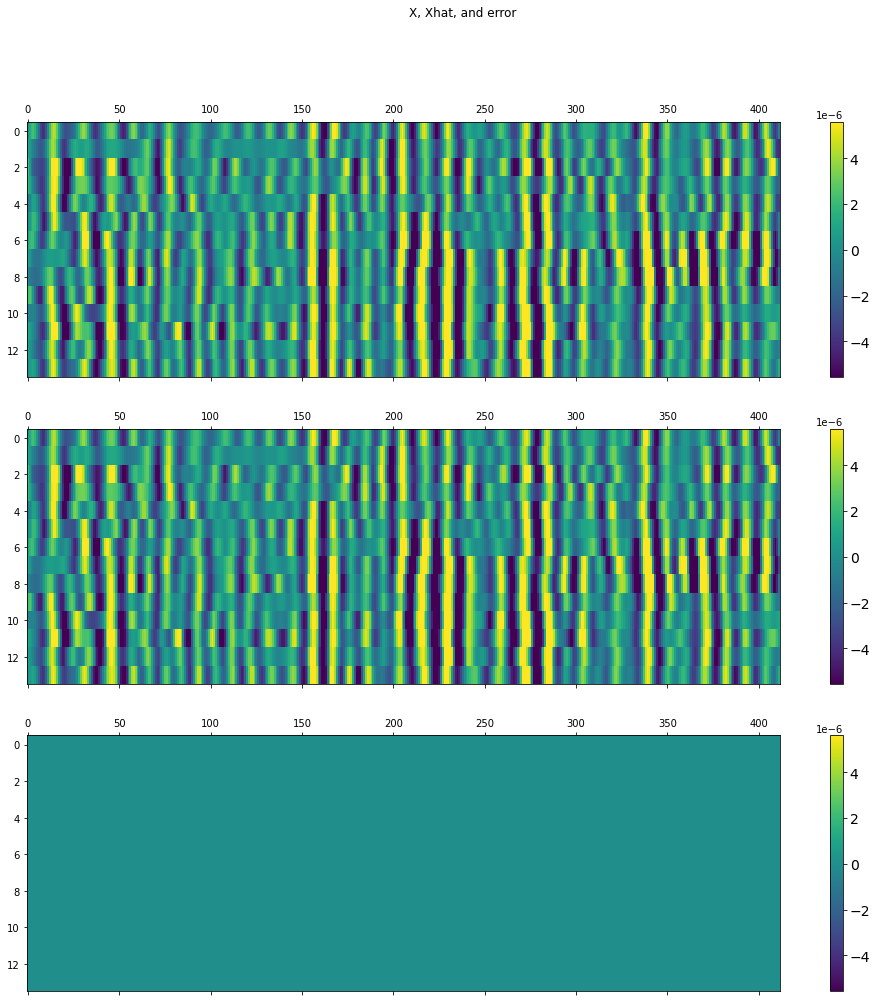

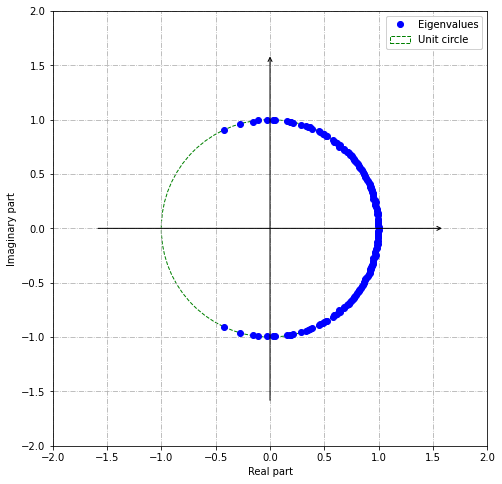

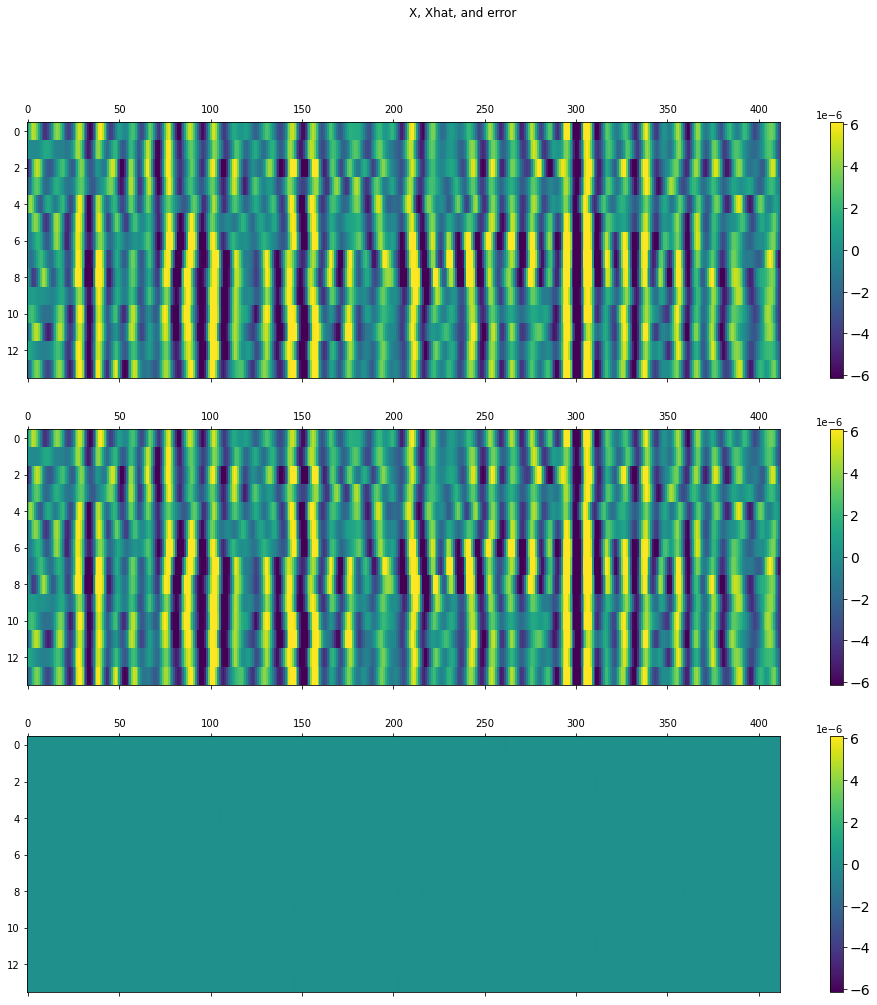

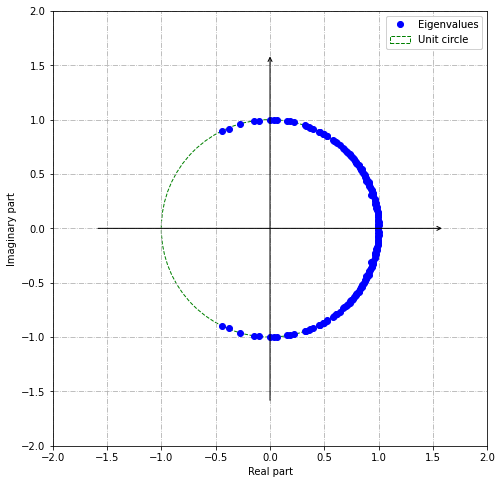

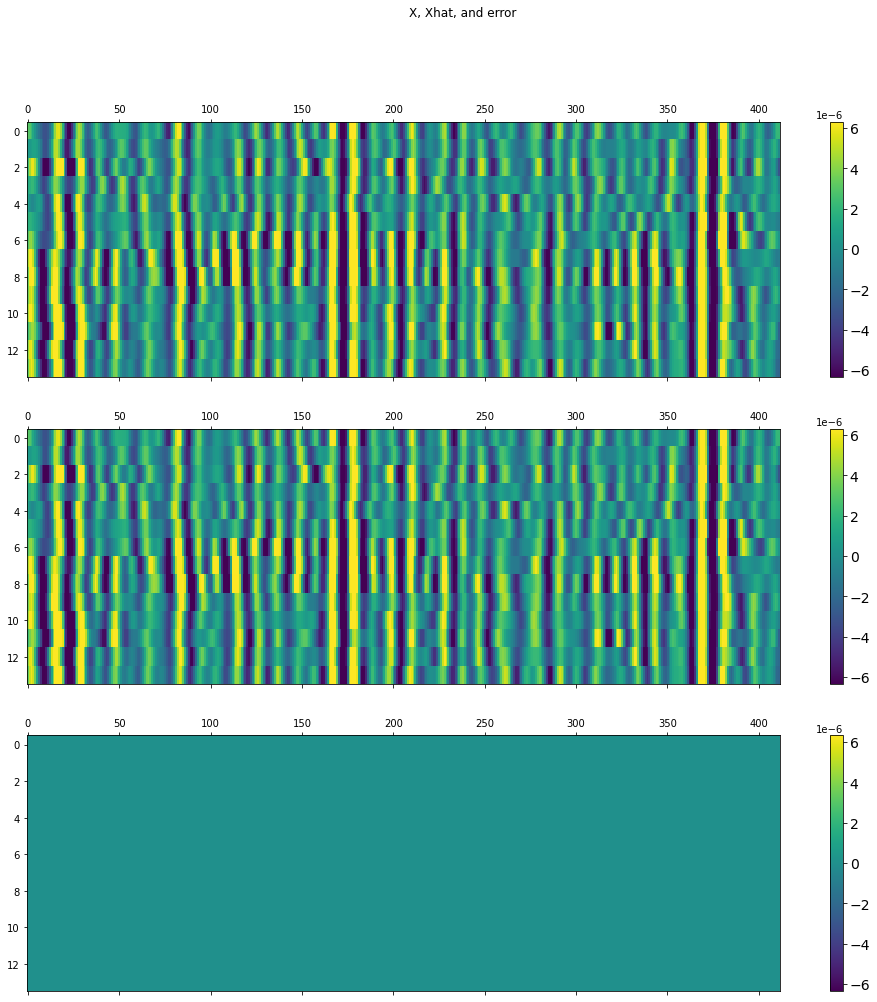

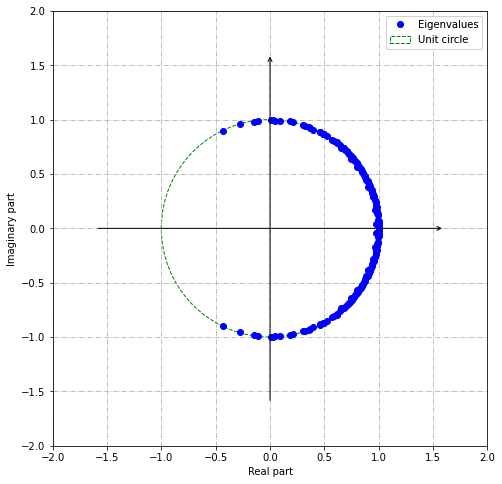

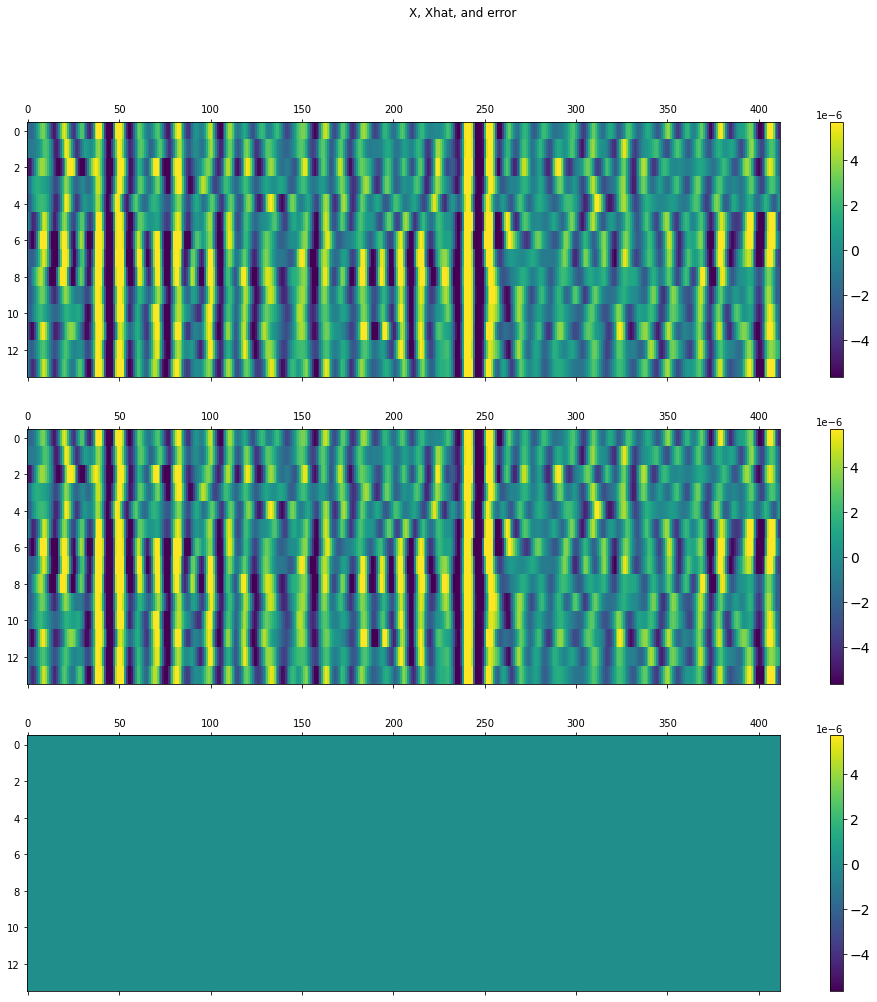

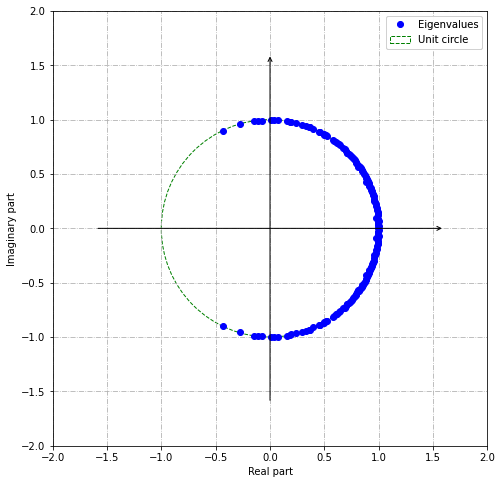

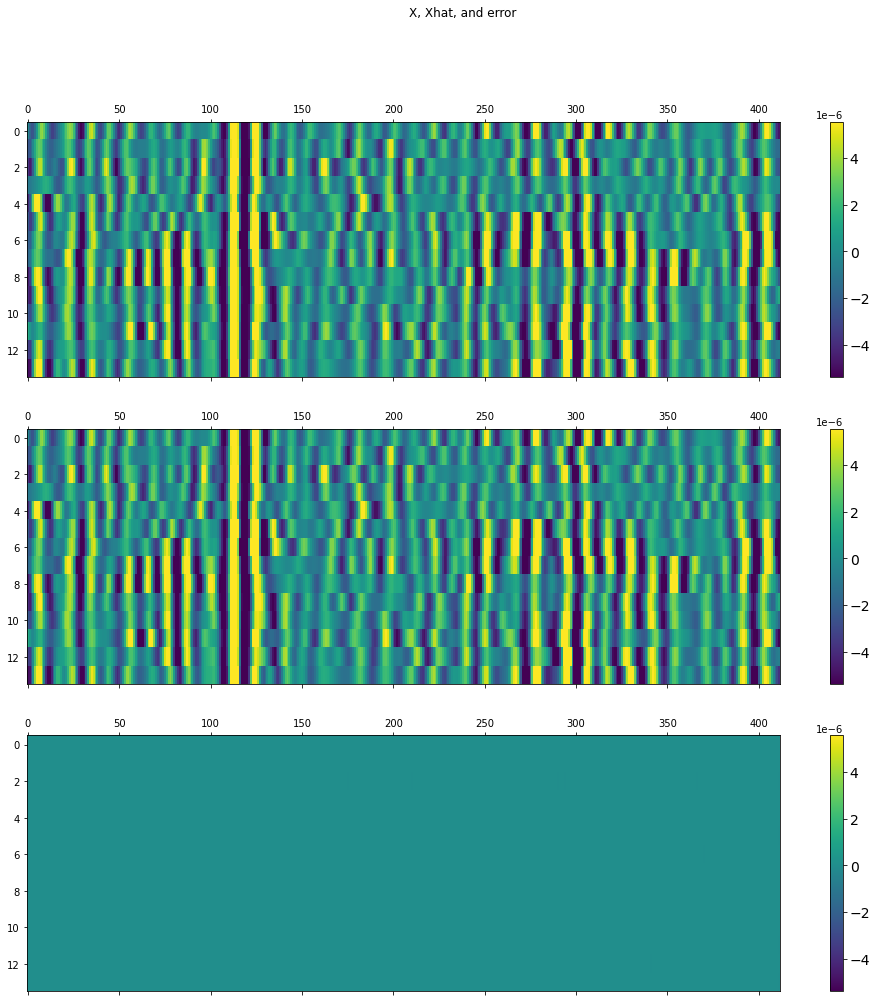

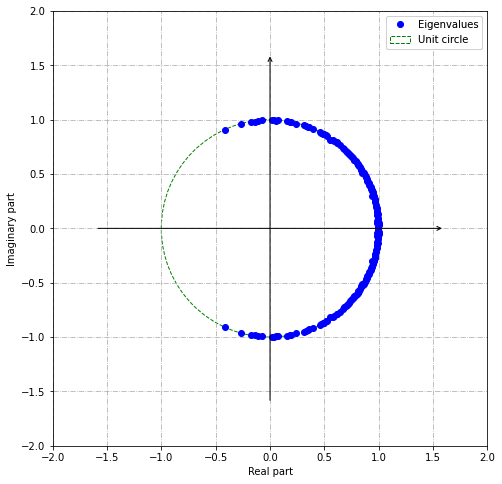

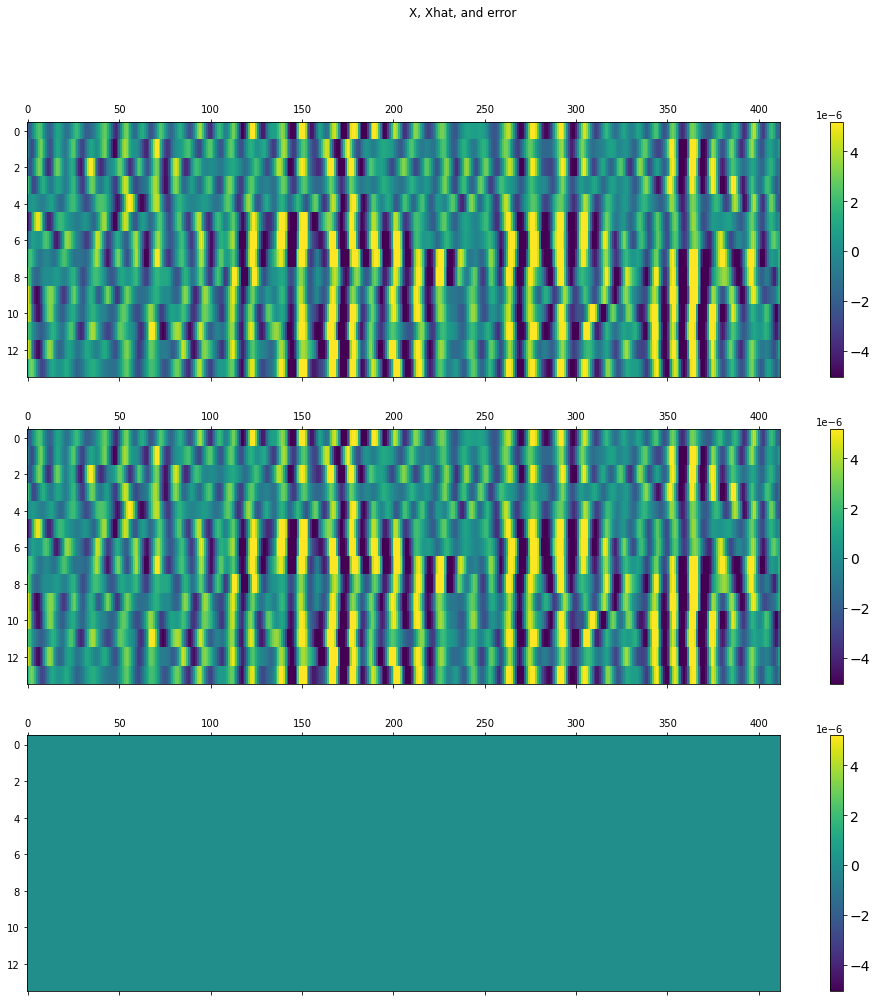

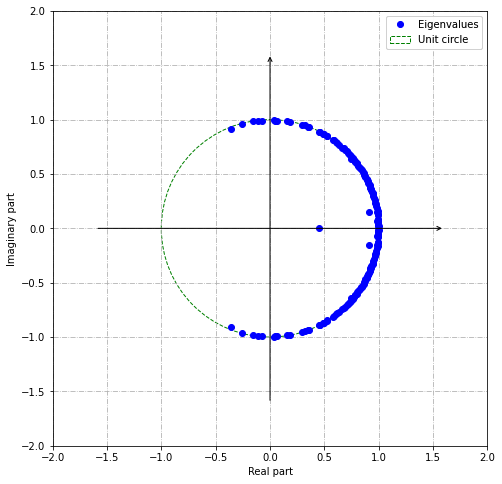

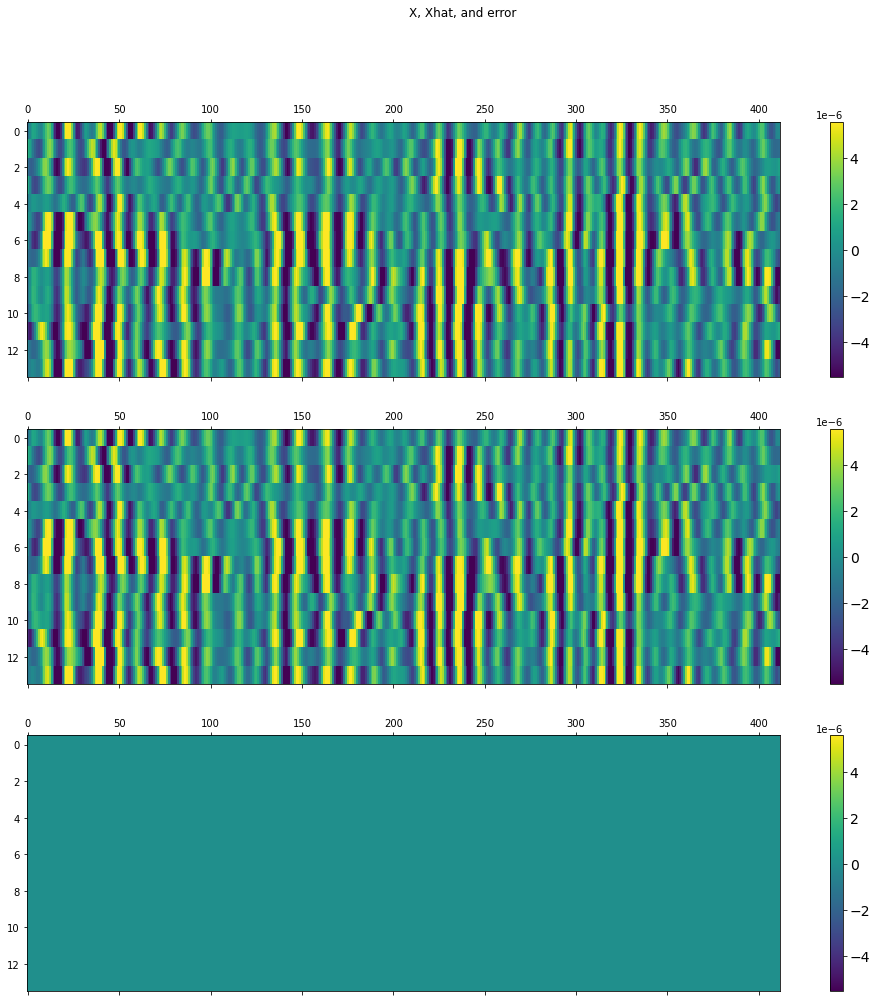

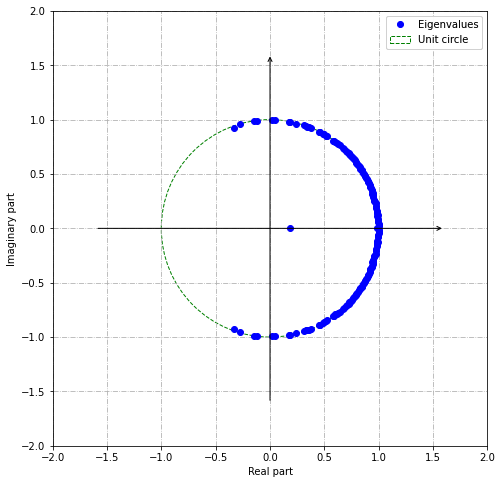

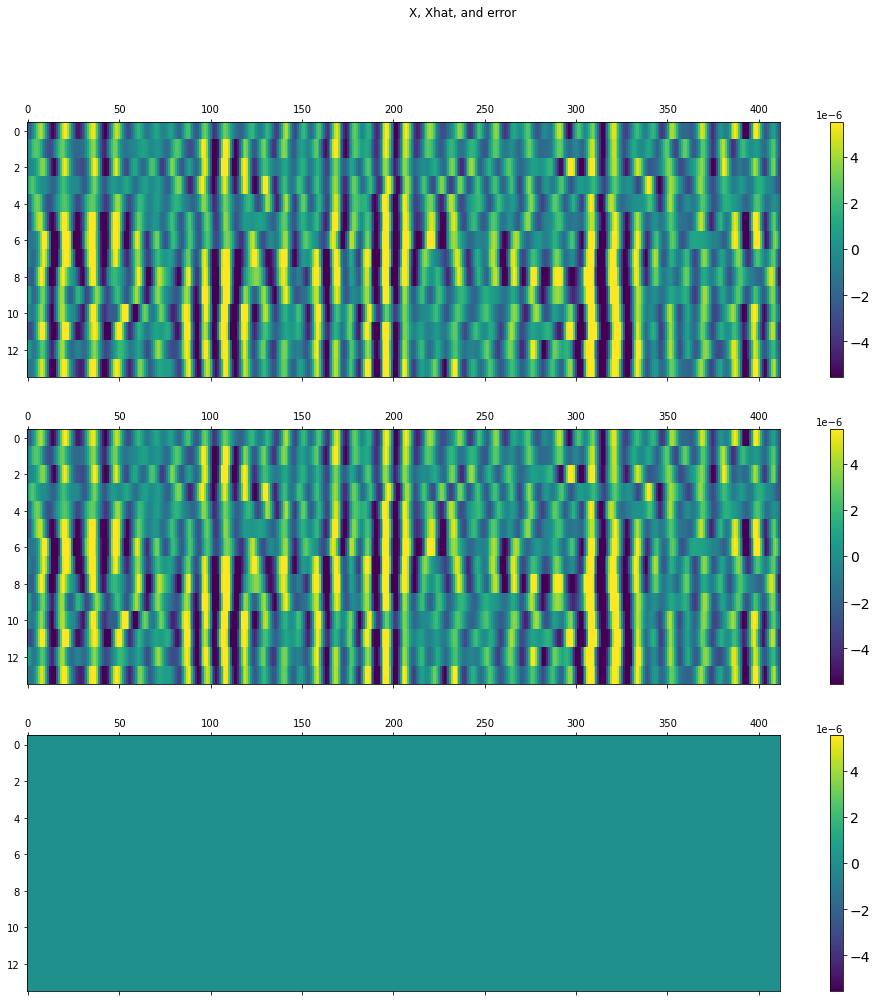

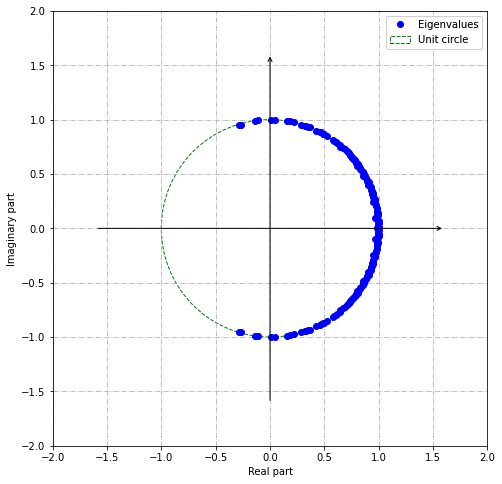

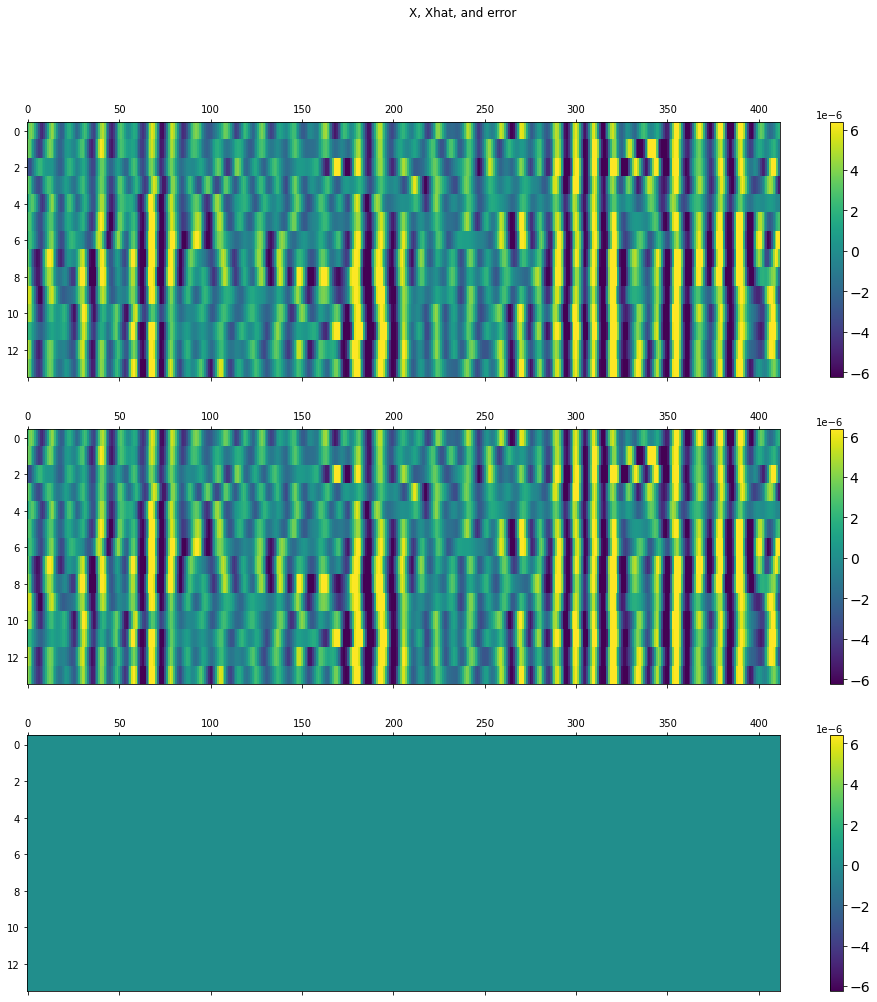

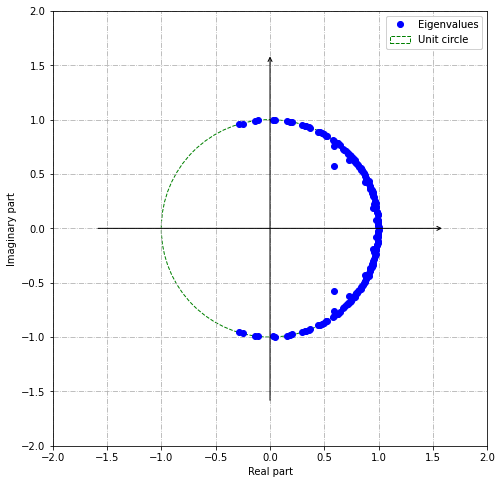

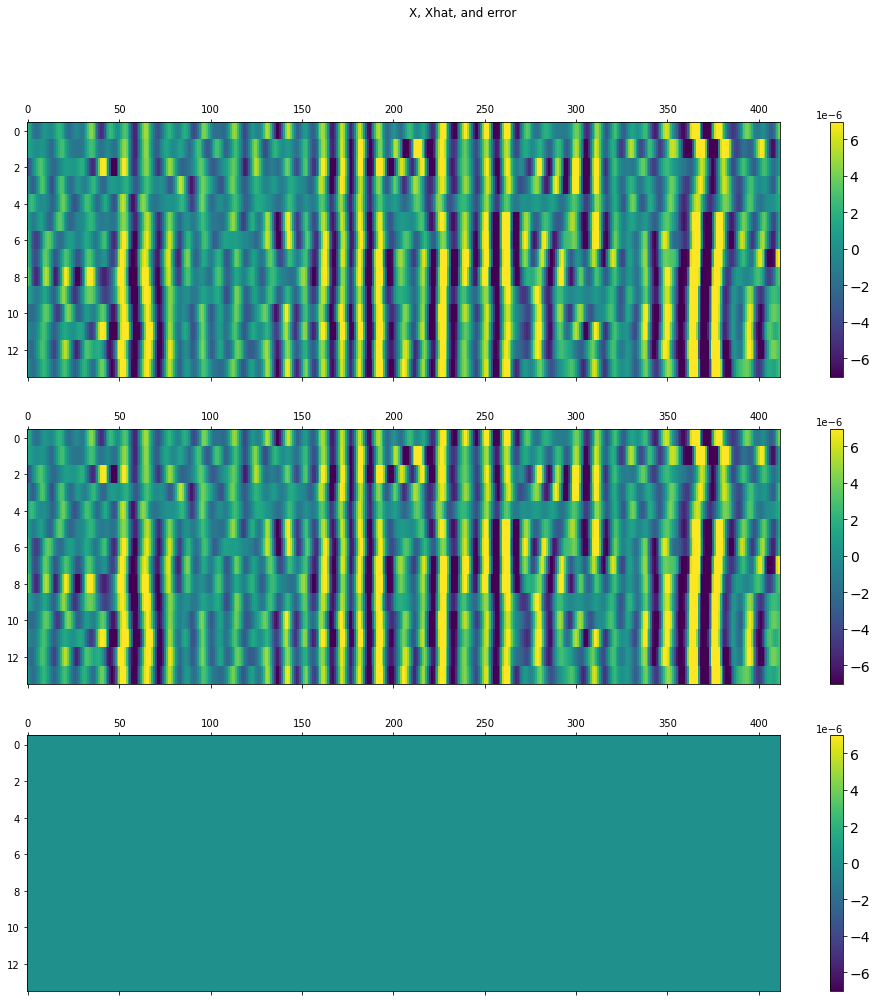

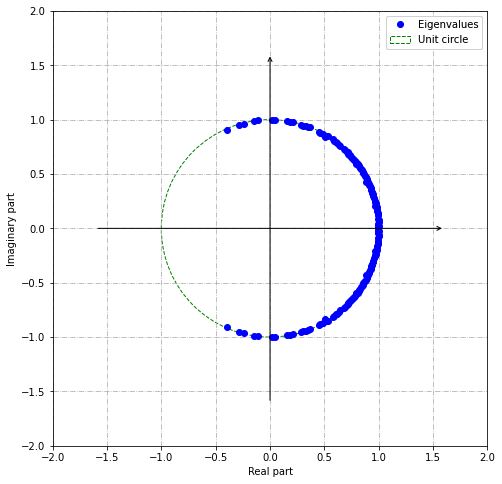

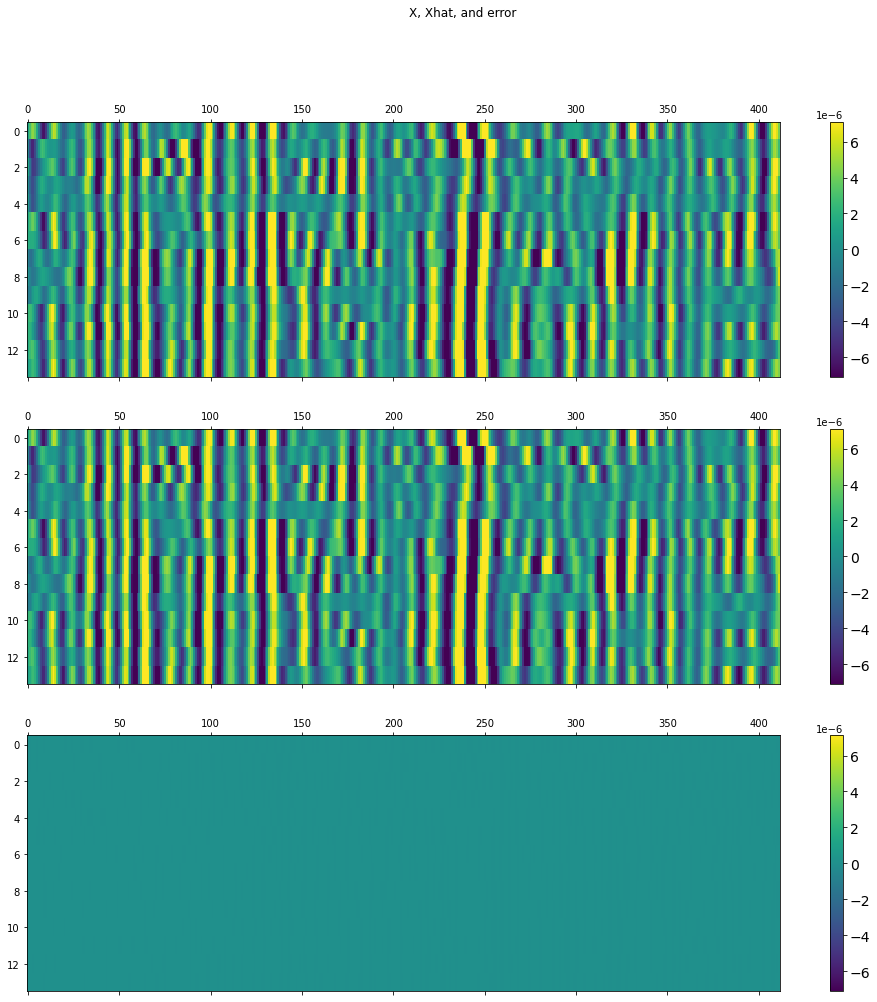

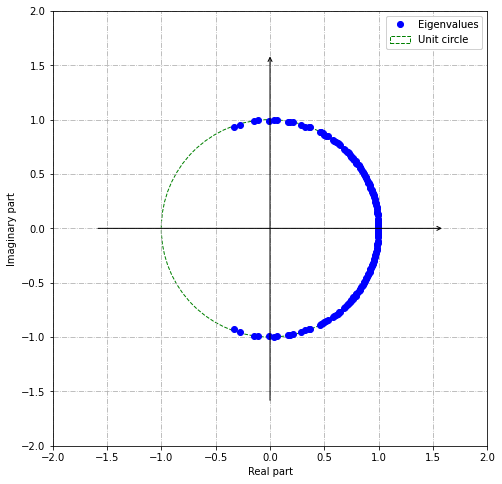

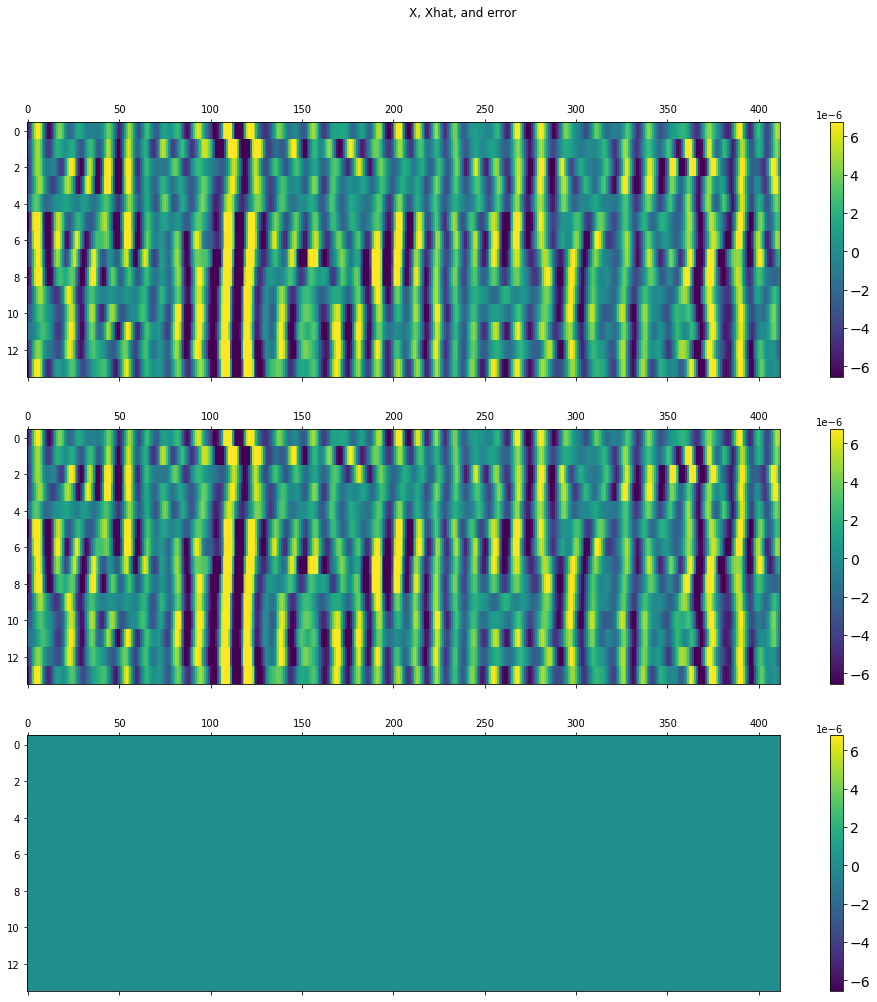

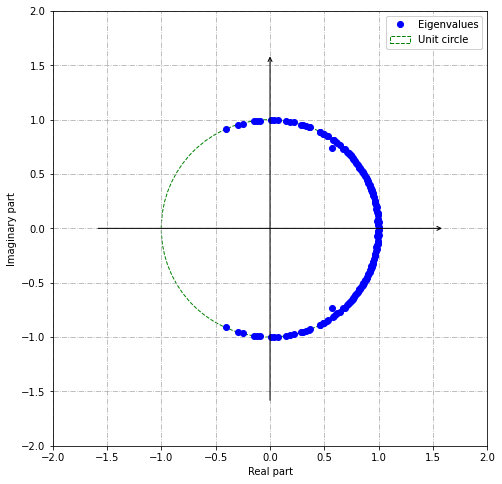

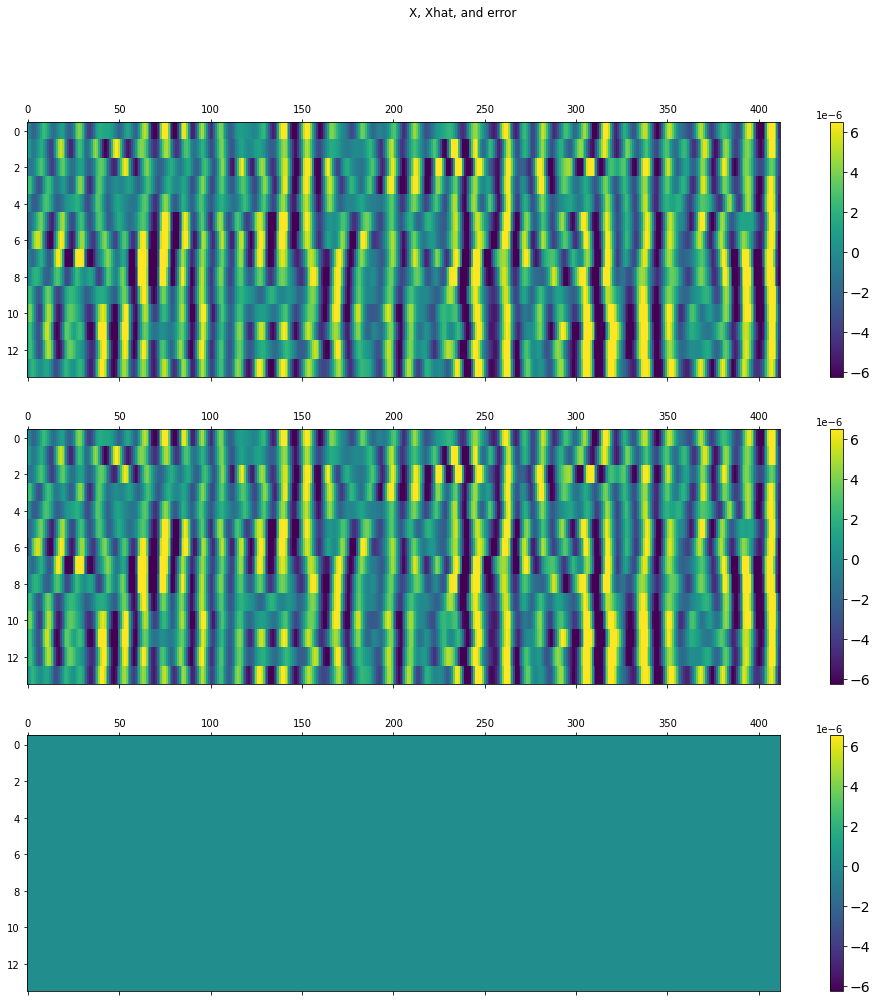

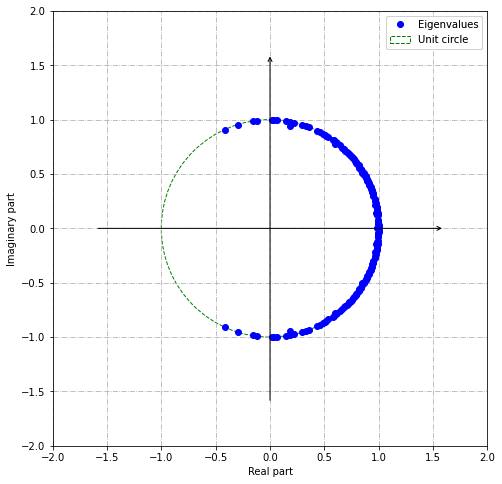

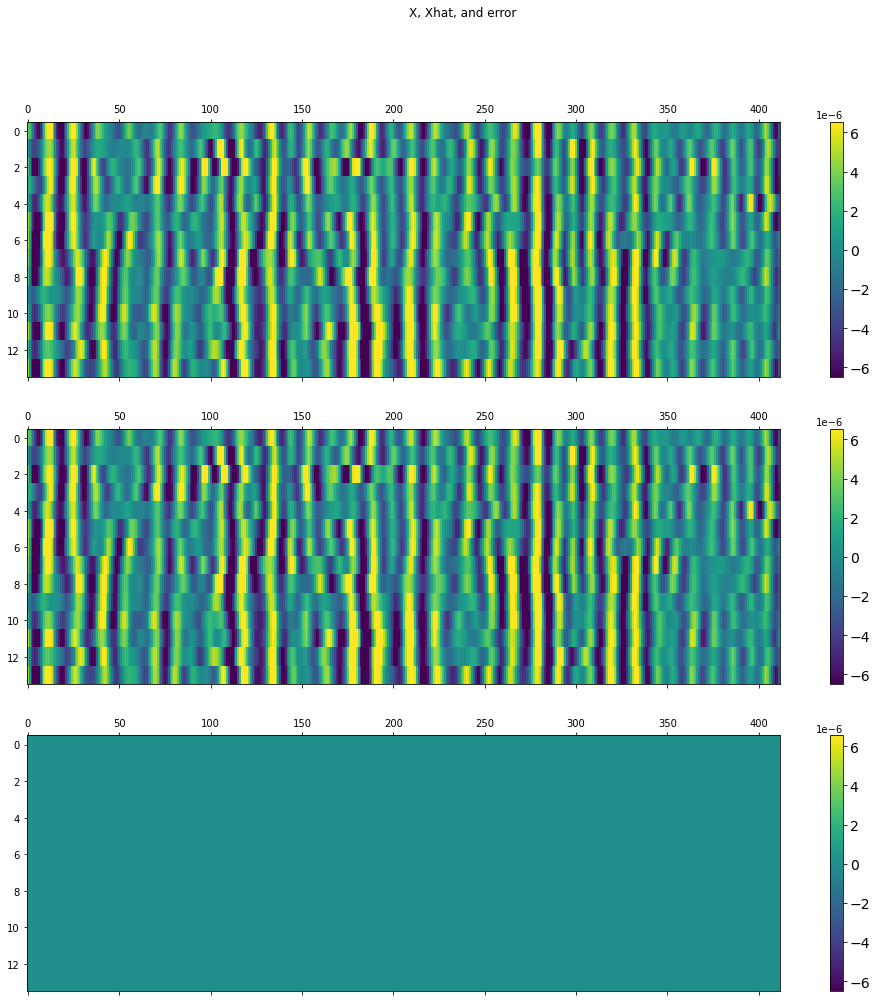

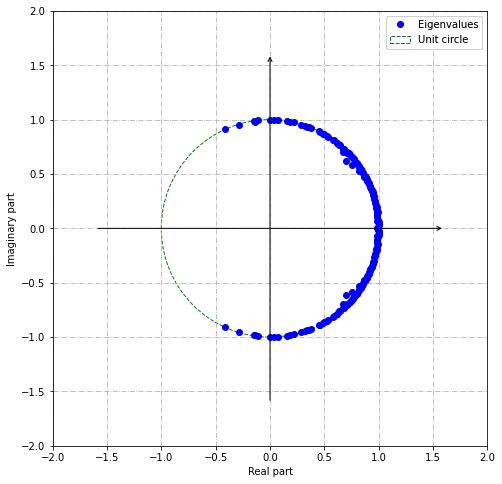

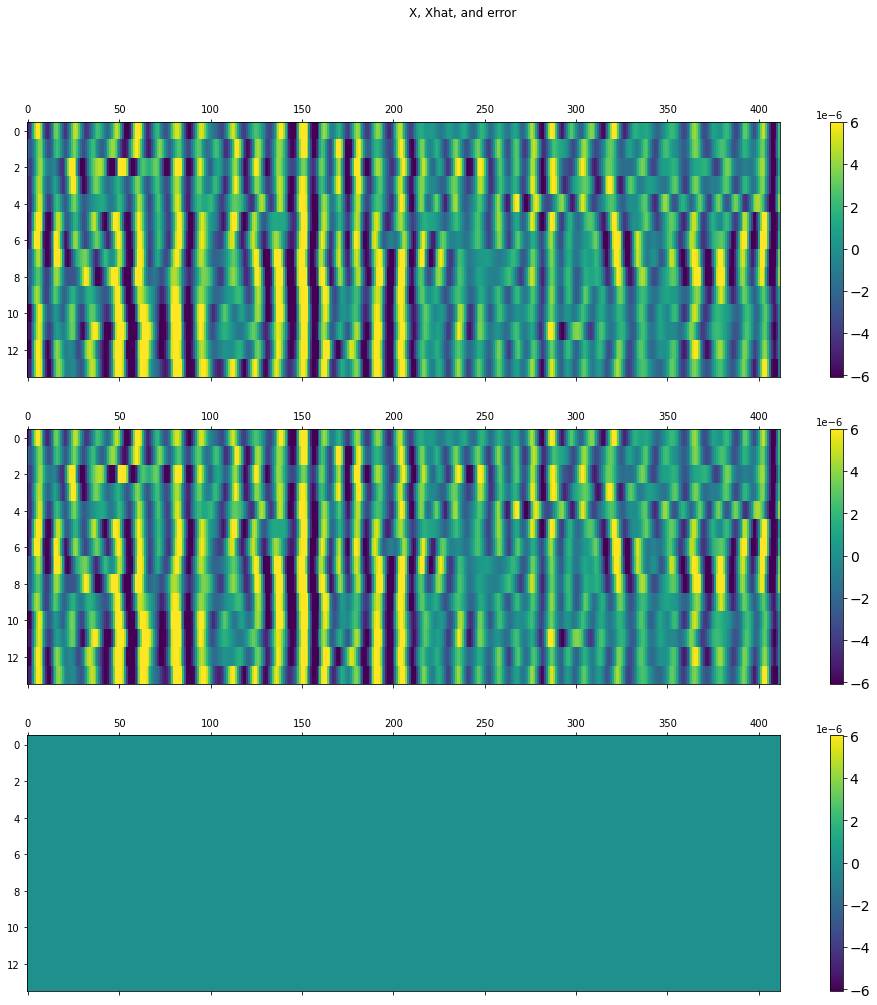

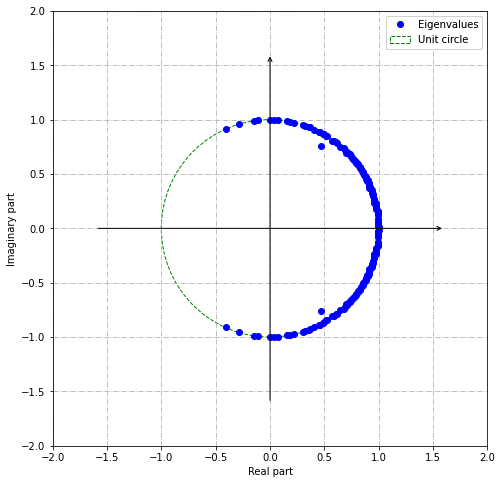

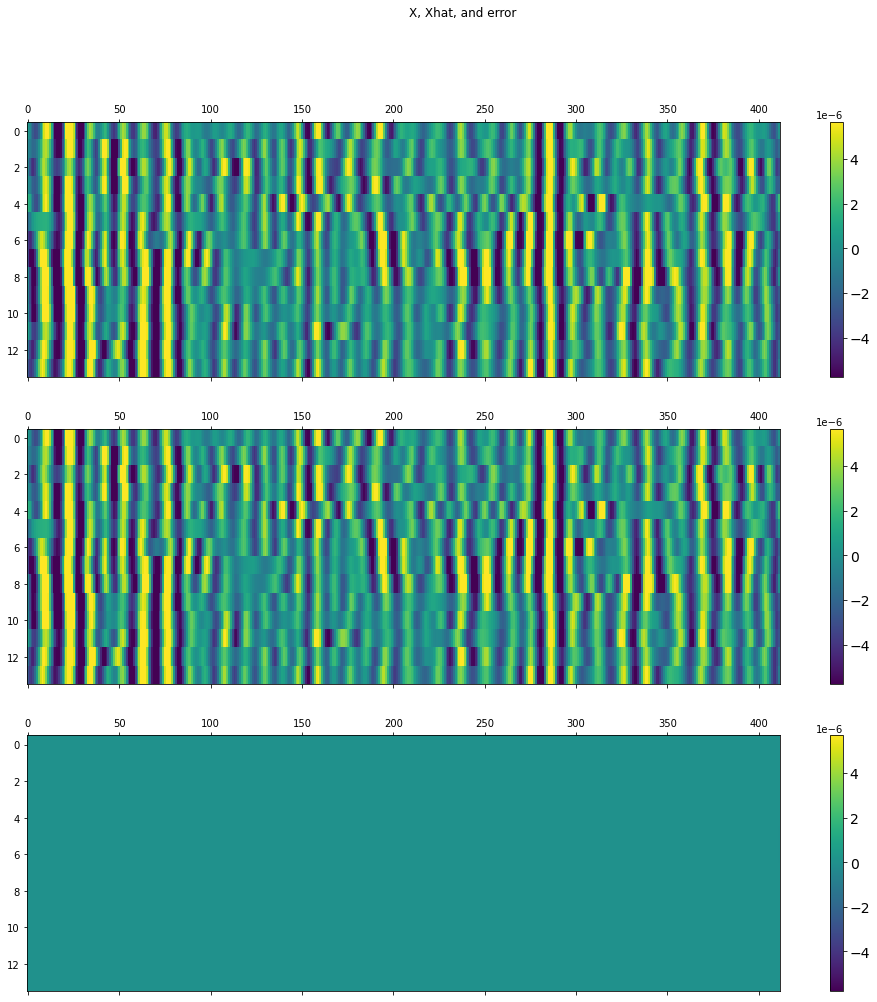

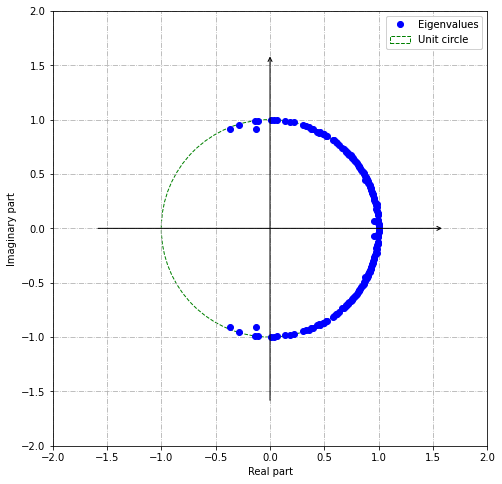

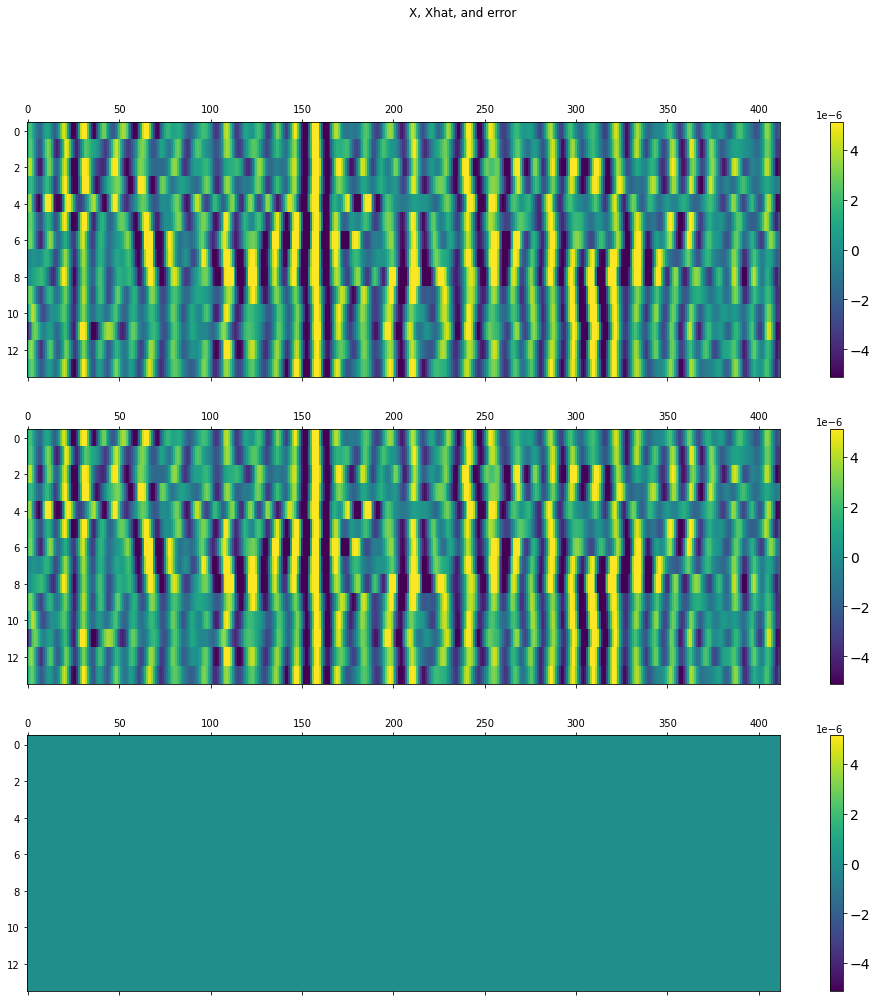

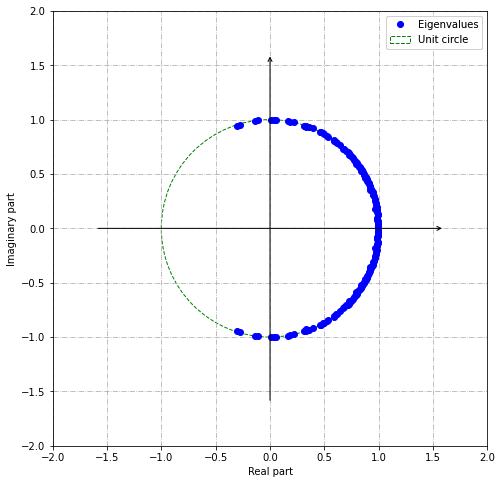

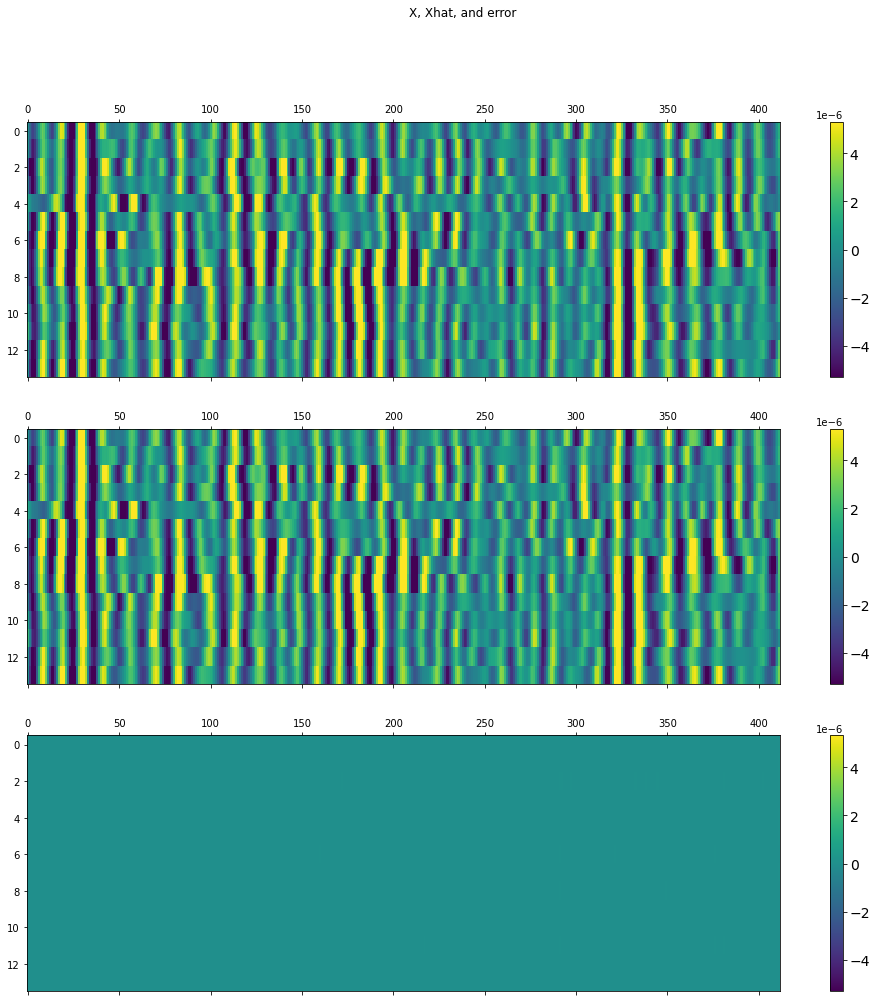

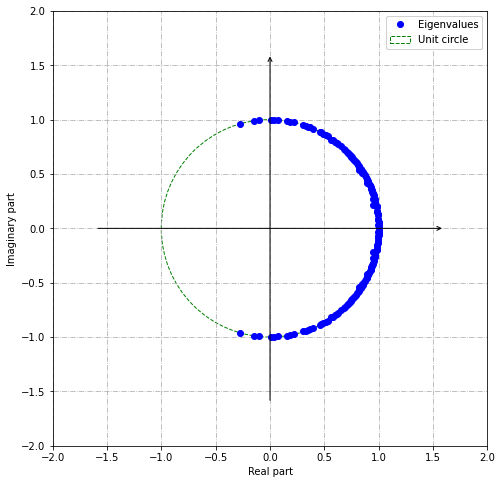

In [37]:
dmds = []
for Xaug in matricies:
    dmd = DMD()
    curr = dmd.fit(Xaug)
    dmds.append(curr)
    fig, axs = plt.subplots(3, figsize=(18, 16))
    fig.suptitle('X, Xhat, and error')
    color_lims = np.percentile(Xaug[0:Xs.shape[1]], [5, 95])
    f = axs[0].matshow(Xaug[0:Xs.shape[1]].tolist(), clim=color_lims, aspect=10)
    cb = fig.colorbar(f, ax=axs[0])
    cb.ax.tick_params(labelsize=14)
    matrix = np.array(dmd.reconstructed_data.real[0:Xs.shape[1]])
    f = axs[1].matshow(matrix[0:Xs.shape[1]].tolist(), clim=color_lims, aspect=10)
    cb = fig.colorbar(f, ax=axs[1])
    cb.ax.tick_params(labelsize=14)
    diff = Xaug[0:Xs.shape[1]] - matrix
    f = axs[2].matshow(diff.tolist(), clim=color_lims, aspect=10)
    cb = fig.colorbar(f, ax=axs[2])
    cb.ax.tick_params(labelsize=14)
    dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8))


Determine success of prediction

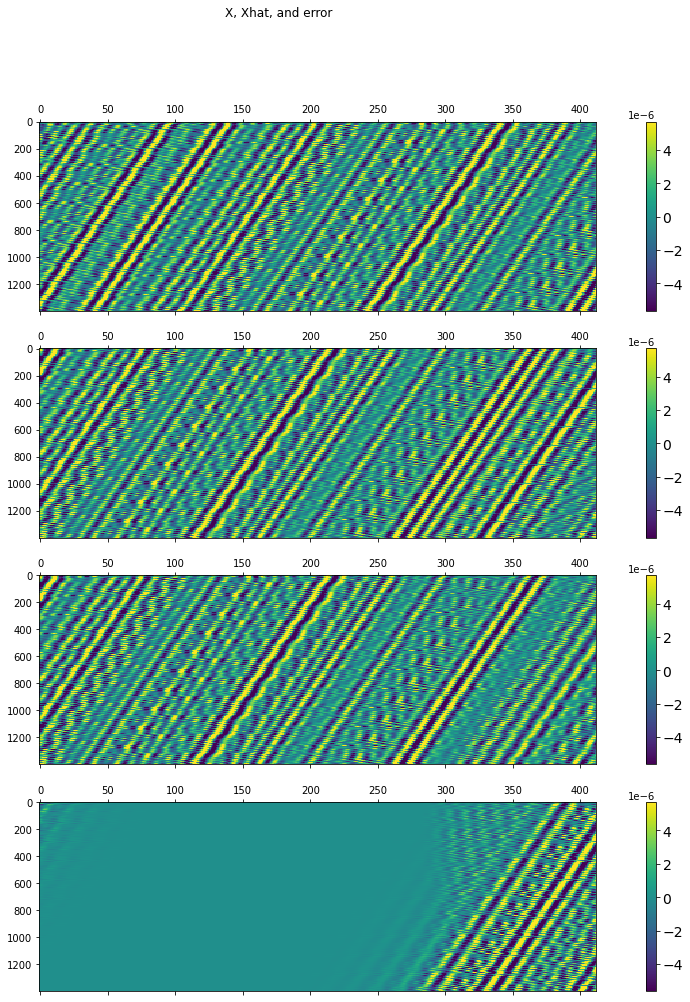

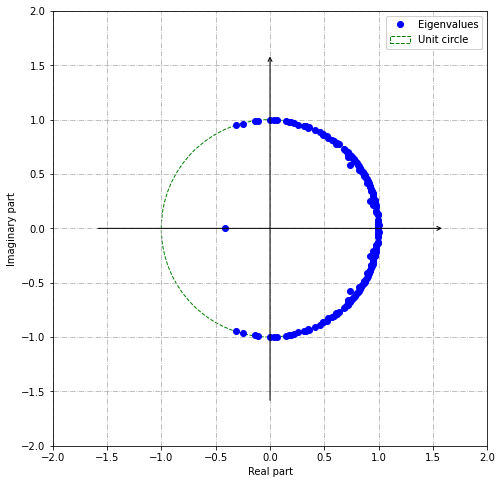

In [40]:
start = 0  # where to start prediction

Xaug = matricies[start]
dmd = dmds[start]

for i in range(128):
    Xaug = dmd.predict(Xaug)

fig, axs = plt.subplots(4, figsize=(18, 16))
fig.suptitle('X, Xhat, and error')
color_lims = np.percentile(matricies[start + 1], [5, 95])
f = axs[0].matshow(matricies[start].tolist(), clim=color_lims, aspect=.1)
cb = fig.colorbar(f, ax=axs[0])
cb.ax.tick_params(labelsize=14)
f = axs[1].matshow(matricies[start + 1].tolist(), clim=color_lims, aspect=.1)
cb = fig.colorbar(f, ax=axs[1])
cb.ax.tick_params(labelsize=14)
matrix = np.array(Xaug.real)
f = axs[2].matshow(matrix.tolist(), clim=color_lims, aspect=.1)
cb = fig.colorbar(f, ax=axs[2])
cb.ax.tick_params(labelsize=14)
diff = matricies[start + 1] - matrix
f = axs[3].matshow(diff.tolist(), clim=color_lims, aspect=.1)
cb = fig.colorbar(f, ax=axs[3])
cb.ax.tick_params(labelsize=14)
dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8))